In [1]:
import pandas as pd
import numpy as np

import geopandas as gpd

import matplotlib.pyplot as plt
import matplotlib.lines as mlines

import seaborn as sns

import cartopy.crs as ccrs
import cartopy.feature as cfeature

import os

from sklearn.decomposition import PCA

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics



In [2]:
def spatial_merge_left_join(plants_df, atmospheric_df):
    
    gdf_plants = gpd.GeoDataFrame(
        plants_df,
        geometry=gpd.points_from_xy(plants_df.Longitude, plants_df.Latitude),
        crs="EPSG:4326"
    )
    
    gdf_atmospheric = gpd.GeoDataFrame(
        atmospheric_df,
        geometry=gpd.points_from_xy(atmospheric_df.LONGITUDE, atmospheric_df.LATITUDE),
        crs="EPSG:4326"
    )

    LOCAL_CRS = "EPSG:5070" 
    gdf_plants_proj = gdf_plants.to_crs(LOCAL_CRS)
    gdf_atmospheric_proj = gdf_atmospheric.to_crs(LOCAL_CRS)

    power_plants_merged_gdf = gpd.sjoin_nearest(
        gdf_plants_proj, 
        gdf_atmospheric_proj,
        how="left", 
        distance_col="distance_meters"
    )
    
    power_plants_merged_gdf['distance_to_match'] = power_plants_merged_gdf['distance_meters'] / 1000.0

    final_df = pd.DataFrame(power_plants_merged_gdf.drop(columns=['geometry', 'index_right', 'distance_meters']))

    return final_df

def plot_map(map_title,
             x,
             y,
             c='blue',
             labels=None,
             cmap=False,
             s=1,
             edgecolor=None,
             linewidths=None,
             alpha=1,
             zorder=1):
    fig = plt.figure(figsize=(20,9))

    _map = fig.add_subplot(1, 1, 1, projection=ccrs.Mercator())

    _map.stock_img()

    _map.add_feature(cfeature.LAND, color='lightgray')

    _map.add_feature(cfeature.OCEAN, color='lightblue')

    _map.add_feature(cfeature.COASTLINE)

    _map.add_feature(cfeature.BORDERS, linestyle=':')

    _map.add_feature(cfeature.LAKES, alpha=0.5, color='lightblue')

    _map.add_feature(cfeature.RIVERS)

    if cmap:
        if edgecolor is not None:
            _map.scatter(x,
                         y,
                         c=c,
                         s=s,
                         cmap=cmap,
                         edgecolor=edgecolor,
                         linewidths=linewidths,
                         alpha=alpha,
                         zorder=zorder,
                         transform=ccrs.PlateCarree())
            
        else:
            _map.scatter(x,
                         y,
                         c=c,
                         s=s,
                         cmap=cmap,
                         alpha=alpha,
                         zorder=zorder,
                         transform=ccrs.PlateCarree())
        
    else:
        _map.scatter(x,
                     y,
                     c=c,
                     s=s,
                     alpha=alpha,
                     zorder=zorder,
                     transform=ccrs.PlateCarree())

    gl = _map.gridlines(draw_labels=True,
                        dms=True,
                        x_inline=False,
                        y_inline=False,
                        color='gray',
                        linestyle='--')

    gl.top_labels = False

    gl.right_labels = False
    
    handles = []

    if labels is not None:
        for i, category in enumerate(categories):
            handle = mlines.Line2D([], [], color=cmap(i), marker='o', linestyle='None',
                              markersize=10, label=category)

            handles.append(handle)

        _map.legend(handles=handles, title=f"{map_title}", bbox_to_anchor=(0, 0), loc='lower left')

    _map.set_title(f"{map_title}")

    plt.show()

# =============================================================================
# Code generated by Artificial Intelligence (Google AI)
# Date: 2025-12-05
# Prompt: "Python function to convert degrees F to degrees C"
# =============================================================================
def fahrenheit_to_celsius(fahrenheit_temp):
    """
    Converts a temperature from Fahrenheit (°F) to Celsius (°C).
    """
    celsius_temp = (fahrenheit_temp - 32) * 5/9
    return celsius_temp

# =============================================================================
# Code generated by Artificial Intelligence (Google AI)
# Date: 2025-12-05
# Prompt: "Python function to calculate relative humidity from NCEI dataset."
# =============================================================================
def calculate_relative_humidity(x):
    """
    Calculates relative humidity (%) using the Magnus approximation and accounts for pressure.
    
    Args:
        temperature_celsius (float): The current ambient air temperature in Celsius.
        dew_point_celsius (float): The dew point temperature in Celsius.
        station_pressure_hpa (float): The actual pressure at the station level in Hectopascals (hPa) or millibars (mb).
        
    Returns:
        float: The calculated relative humidity as a percentage.
    """
    
    temperature_celsius = x['TEMP_C']
    
    dew_point_celsius = x['DEWP']
    
    station_pressure_hpa = x['STP']
    
    # 1. Calculate Saturation Vapor Pressure (es) at current T (Magnus-Tetens formula)
    # Constants used for water vapor over water
    A = 17.625
    B = 243.04
    es = 6.112 * np.exp((A * temperature_celsius) / (B + temperature_celsius))
    # 2. Calculate Actual Vapor Pressure (e) at Td (e is es at dew point)
    e = 6.112 * np.exp((A * dew_point_celsius) / (B + dew_point_celsius))
    # 3. Apply the Enhancement Factor (f) - This is where pressure comes in
    # This factor corrects for the behavior of moist air at different pressures.
    f = 1 + (1e-6 * station_pressure_hpa * (4.5 + 6e-4 * temperature_celsius**2))
    # 4. Calculate RH
    # RH = (e / (f * es)) * 100
    # For most standard uses, f is very close to 1, and often omitted. 
    # The calculation is robust without it, but more reliable with it.
    
    RH = (e / (f * es)) * 100
    
    # Constrain the result to physical limits
    RH = max(0, min(100, RH))
    return RH

<h3>Step 1: Data Cleaning & EDA</h3>

Document at least 5 data quality issues you found and how you fixed them.<br>
[ ]<br>
[ ]<br>
[ ]<br>
[ ]<br>
[ ]<br>

Create at least 4-6 visualizations showing distributions, relationships, and potential patterns (aim for 6+ for excellent work).<br>
[ ] NASA Rainforest map vs. atmospheric data classifier.<br>
[ ] Global Map of Power Plants.<br>
[ ]<br>
[ ]<br>

Explain what you notice in plain language.<br>

In [3]:
ncei_atmospheric = pd.read_csv('data/full_atmospheric.csv', index_col=0)

In [4]:
ncei_stations_id = pd.read_csv('data/ncei_stations_id.csv', index_col=0)

In [5]:
power_plants = pd.read_csv('data/power_plant_distance_to_water.csv', index_col=0)

power_plants

Powerplant Name     gppd_idnr  \
0           Kajaki Hydroelectric Power Plant Afghanistan  GEODB0040538   
1          Mahipar Hydroelectric Power Plant Afghanistan  GEODB0040541   
2       Naghlu Dam Hydroelectric Power Plant Afghanistan  GEODB0040534   
3      Nangarhar (Darunta) Hydroelectric Power Plant ...  GEODB0040536   
4                Northwest Kabul Power Plant Afghanistan  GEODB0040540   
...                                                  ...           ...   
29905                                              Ndola    WRI1022386   
29906                                              Nkana    WRI1022384   
29907                                     Victoria Falls    WRI1022380   
29908                   Hwange Coal Power Plant Zimbabwe  GEODB0040404   
29909  Kariba Dam South Hydroelectric Power Station Z...  GEODB0003803   

       Capacity (MW) Primary Fuel  Owner                             Source  \
0              33.00        Hydro    NaN                              GEODB   
1              66.00        Hydro    NaN                              GEODB   
2             100.00        Hydro    NaN                              GEODB   
3              11.55        Hydro    NaN                              GEODB   
4              42.00          Gas    NaN                              GEODB   
...              ...          ...    ...                                ...   
29905          50.00          Oil  ZESCO  Energy Regulation Board of Zambia   
29906          20.00          Oil  ZESCO  Energy Regulation Board of Zambia   
29907         108.00        Hydro  ZESCO  Energy Regulation Board of Zambia   
29908         920.00         Coal    NaN                              GEODB   
29909         750.00        Hydro    NaN                              GEODB   

       distance_to_water_km  Longitude  Latitude  
0                  1.275908    65.1190   32.3220  
1                 90.086085    69.4787   34.5560  
2                111.968838    69.7170   34.6410  
3                170.947720    70.3633   34.4847  
4                 56.819837    69.1134   34.5638  
...                     ...        ...       ...  
29905             52.953034    28.6333  -12.9667  
29906              7.135709    28.2000  -12.8167  
29907              0.609805    25.8500  -17.9167  
29908             32.309980    26.4700  -18.3835  
29909              0.370086    28.7619  -16.5222  

[29910 rows x 9 columns]

/var/folders/gl/919514x5085c7h3zzn_f471w0000gp/T/ipykernel_67144/3158995857.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap(cmap_name, num_categories)


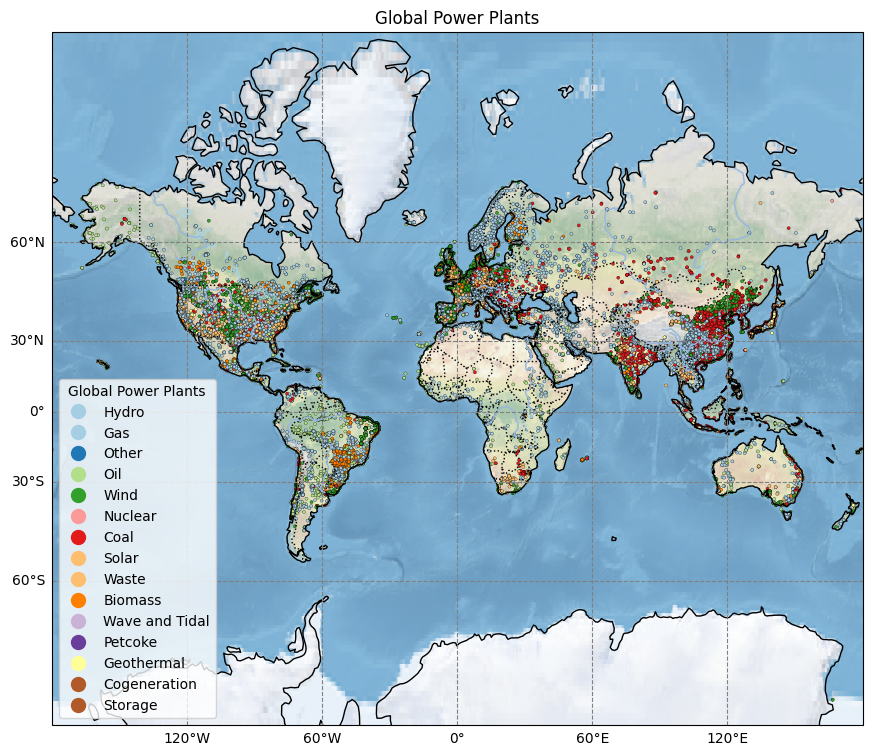

In [6]:
levels, categories = pd.factorize(power_plants[f"Primary Fuel"])

num_categories = len(categories)

cmap_name = 'Paired'

cmap = plt.cm.get_cmap(cmap_name, num_categories)

plot_map(f"Global Power Plants",
             power_plants['Longitude'],
             power_plants['Latitude'],
             c=levels,
             labels=power_plants[f"Primary Fuel"],
             cmap=cmap,
             s=5,
             edgecolor='black',
             linewidths=0.2)

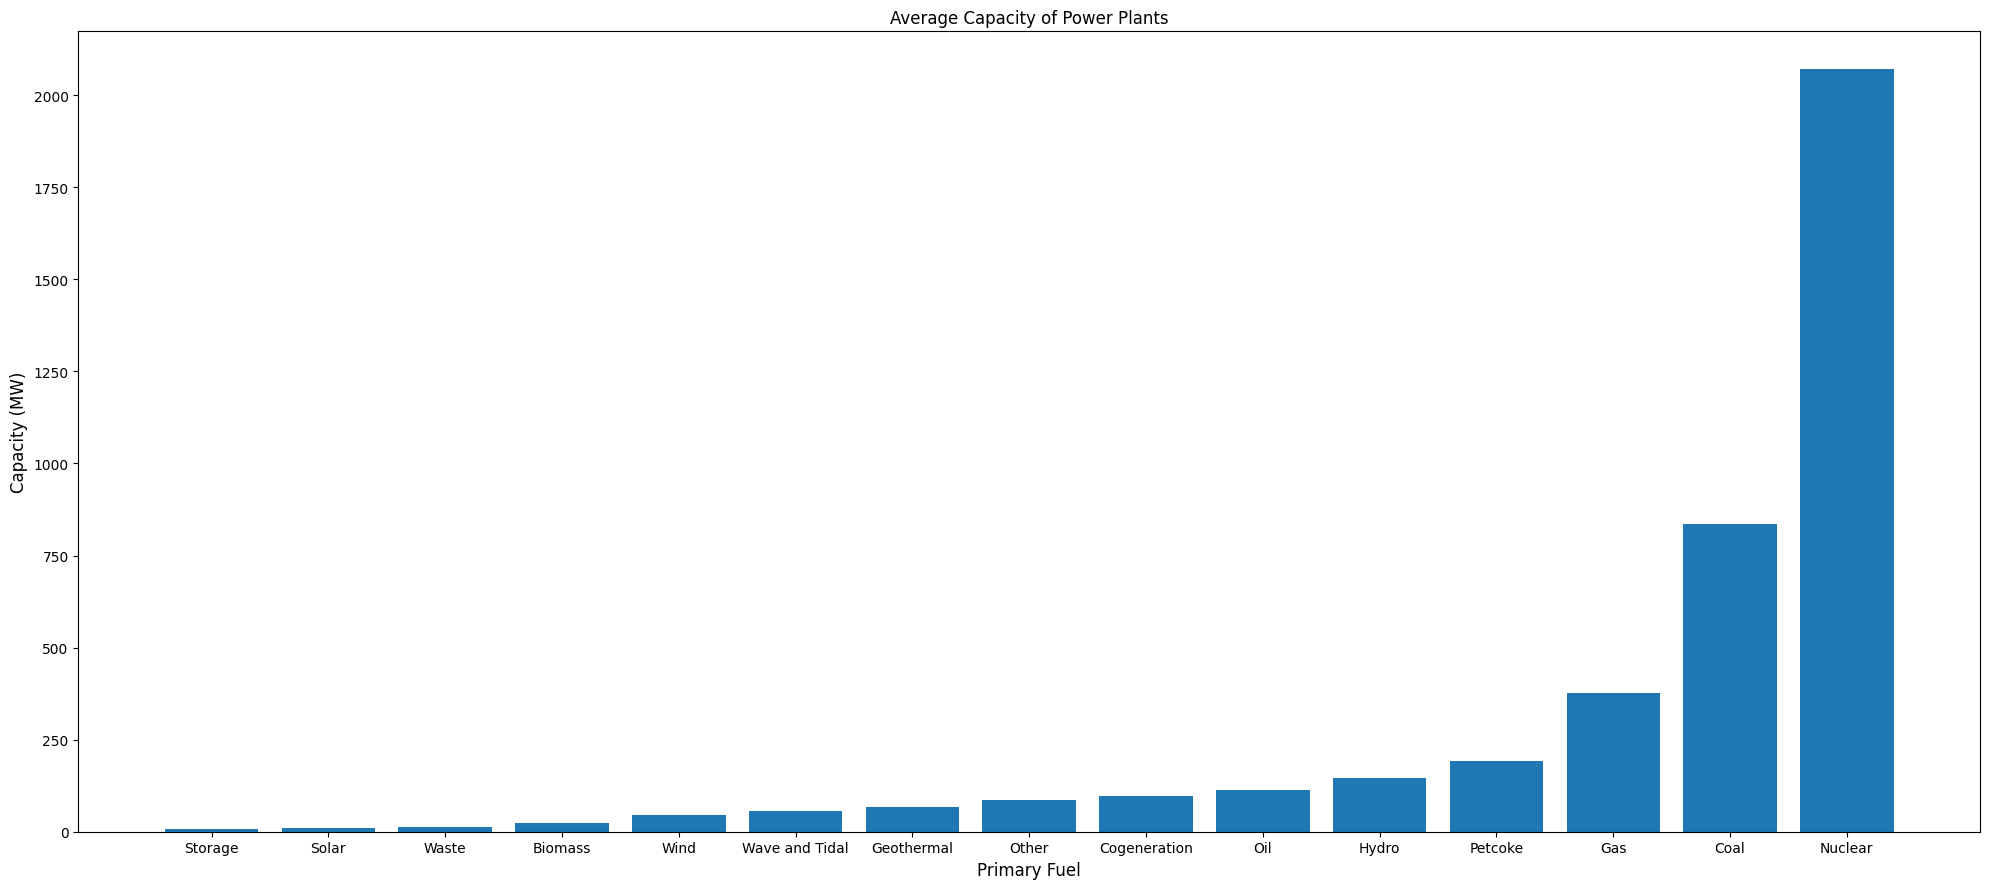

In [7]:
fig = plt.figure(figsize=(20,9))

power_plant_capacity = power_plants.groupby('Primary Fuel')['Capacity (MW)'].mean()

plt.bar(power_plant_capacity.sort_values().index,power_plant_capacity.sort_values())

plt.title("Average Capacity of Power Plants")

plt.xlabel("Primary Fuel", fontsize=12)

plt.ylabel("Capacity (MW)", fontsize=12)

plt.tight_layout()

plt.show()

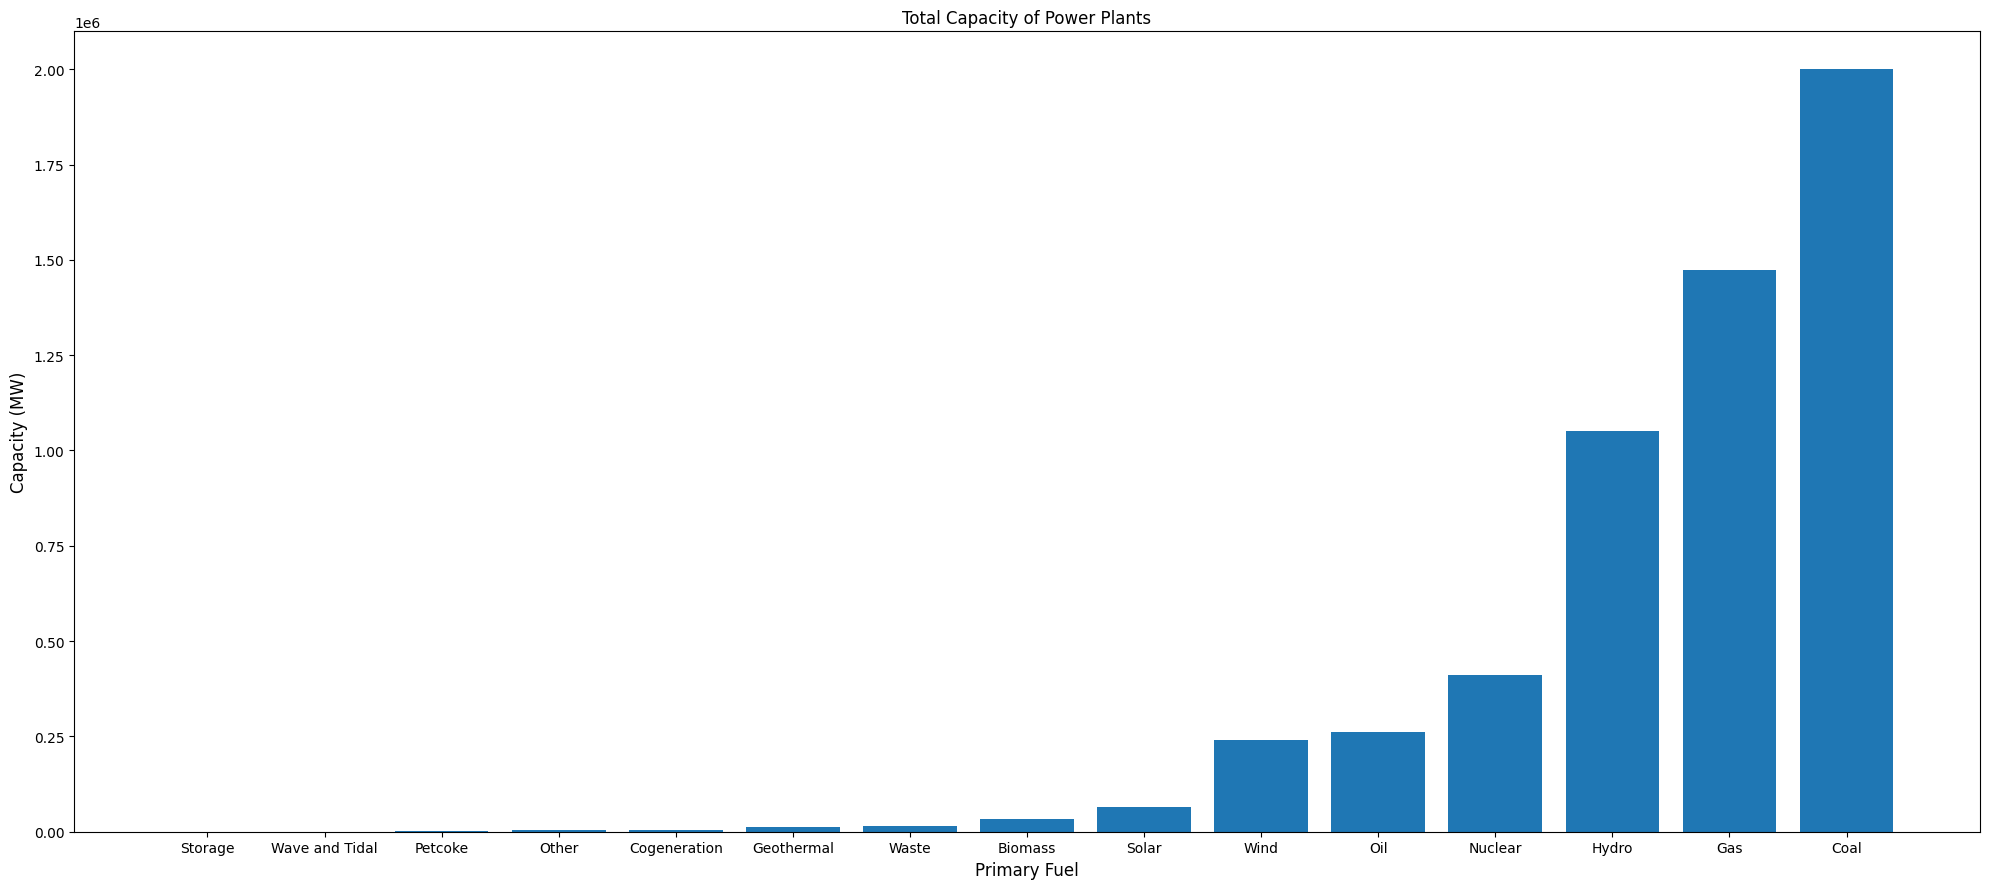

In [8]:
fig = plt.figure(figsize=(20,9))

power_plant_capacity = power_plants.groupby('Primary Fuel')['Capacity (MW)'].sum()

plt.bar(power_plant_capacity.sort_values().index,power_plant_capacity.sort_values())

plt.title("Total Capacity of Power Plants")

plt.xlabel("Primary Fuel", fontsize=12)

plt.ylabel("Capacity (MW)", fontsize=12)

plt.tight_layout()

plt.show()

In [9]:
power_plants['Capacity (MW)'].sum()

5572077.7622569995

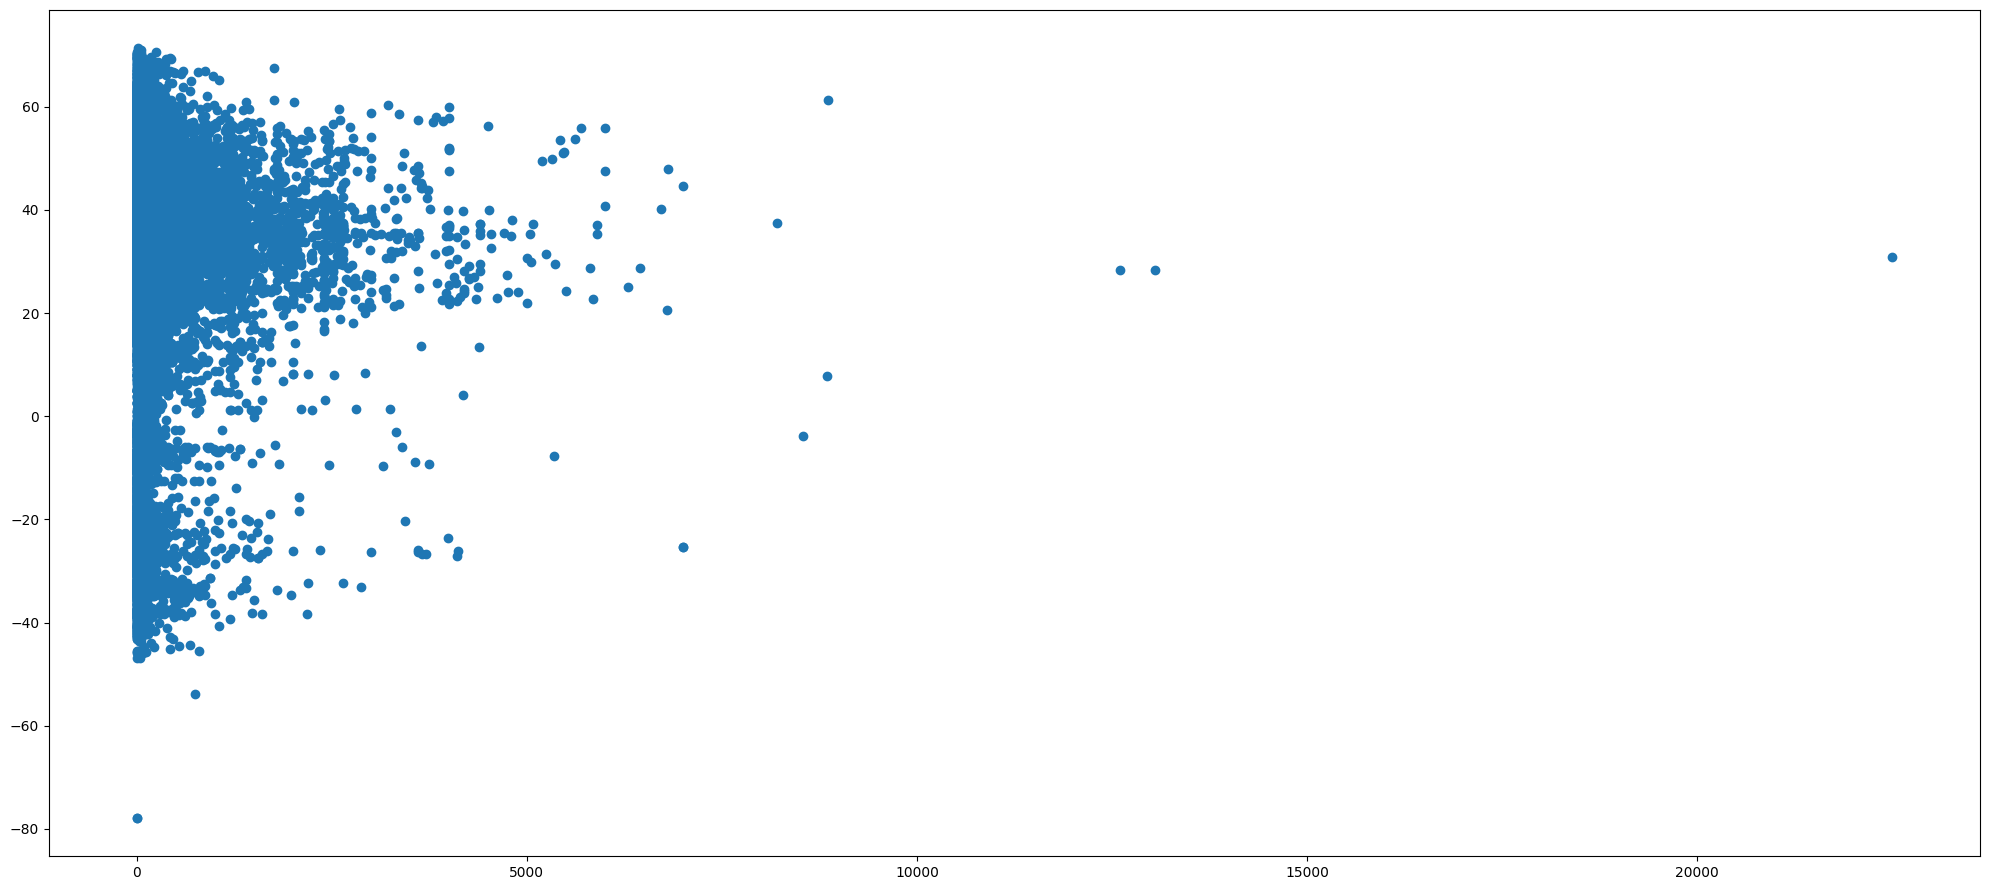

In [10]:
fig = plt.figure(figsize=(20,9))

plt.scatter(power_plants['Capacity (MW)'], power_plants['Latitude'])

plt.title("")

plt.xlabel("", fontsize=12)

plt.ylabel("", fontsize=12)

plt.tight_layout()

plt.show()

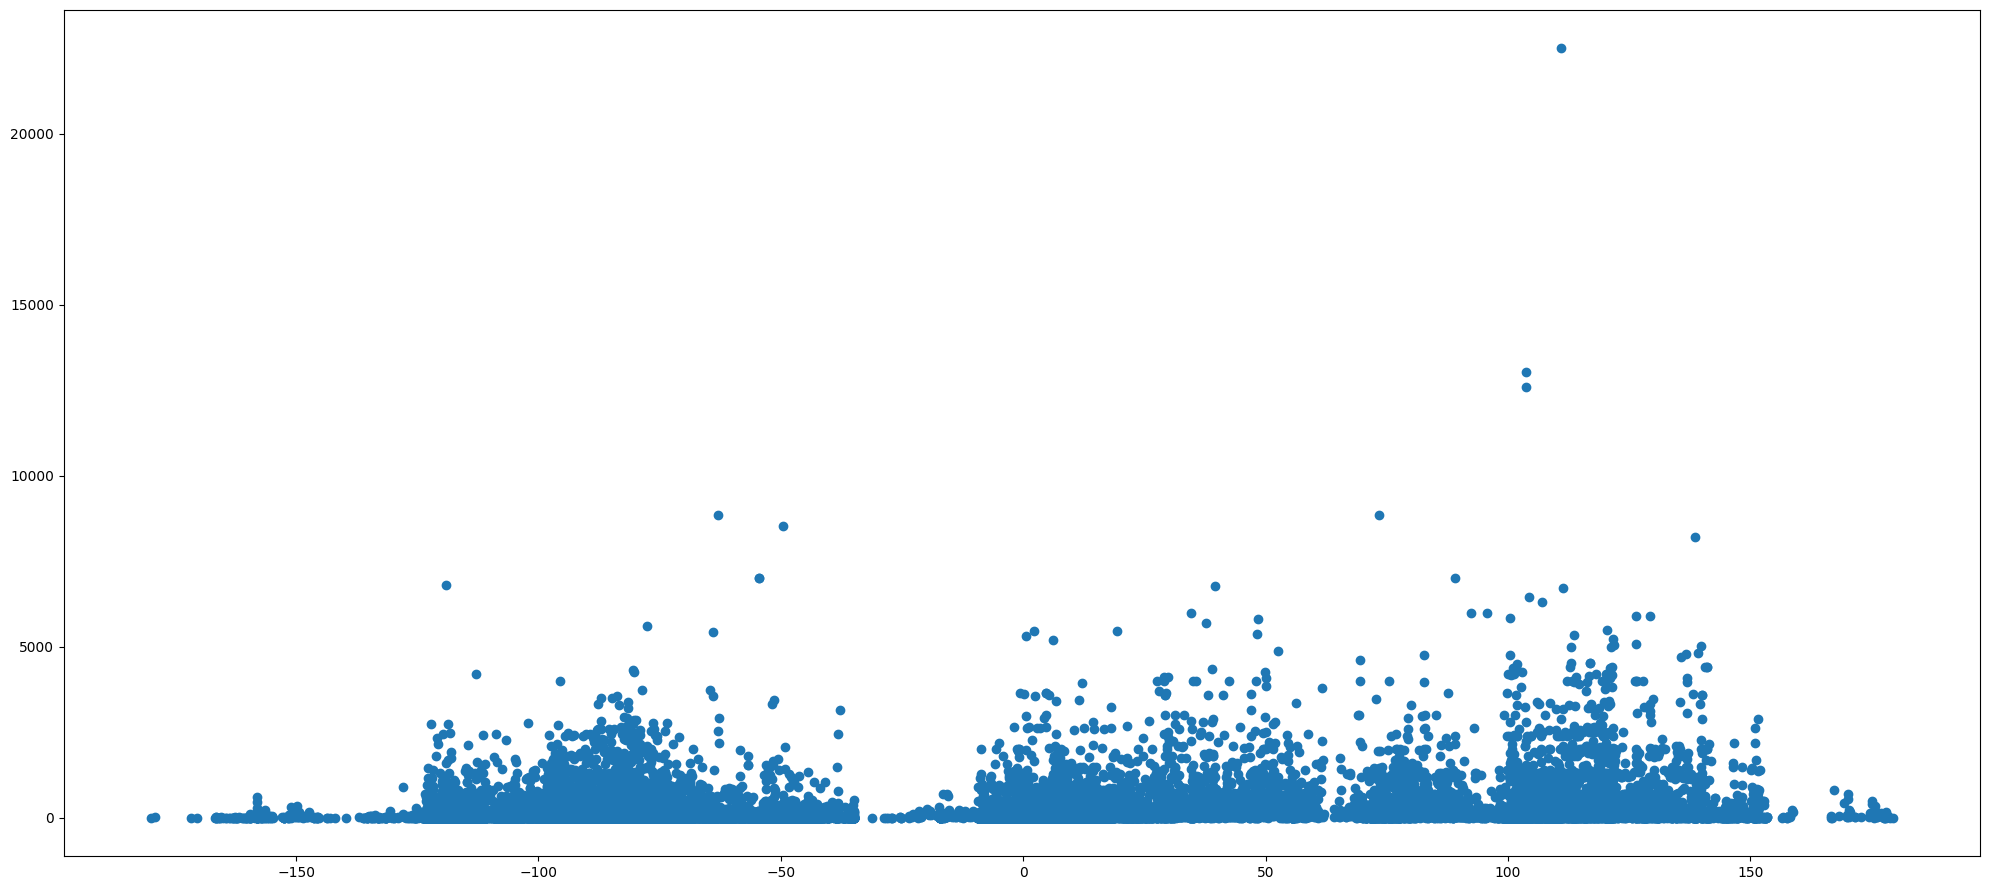

In [11]:
fig = plt.figure(figsize=(20,9))

plt.scatter(power_plants['Longitude'], power_plants['Capacity (MW)'])

plt.title("")

plt.xlabel("", fontsize=12)

plt.ylabel("", fontsize=12)

plt.tight_layout()

plt.show()

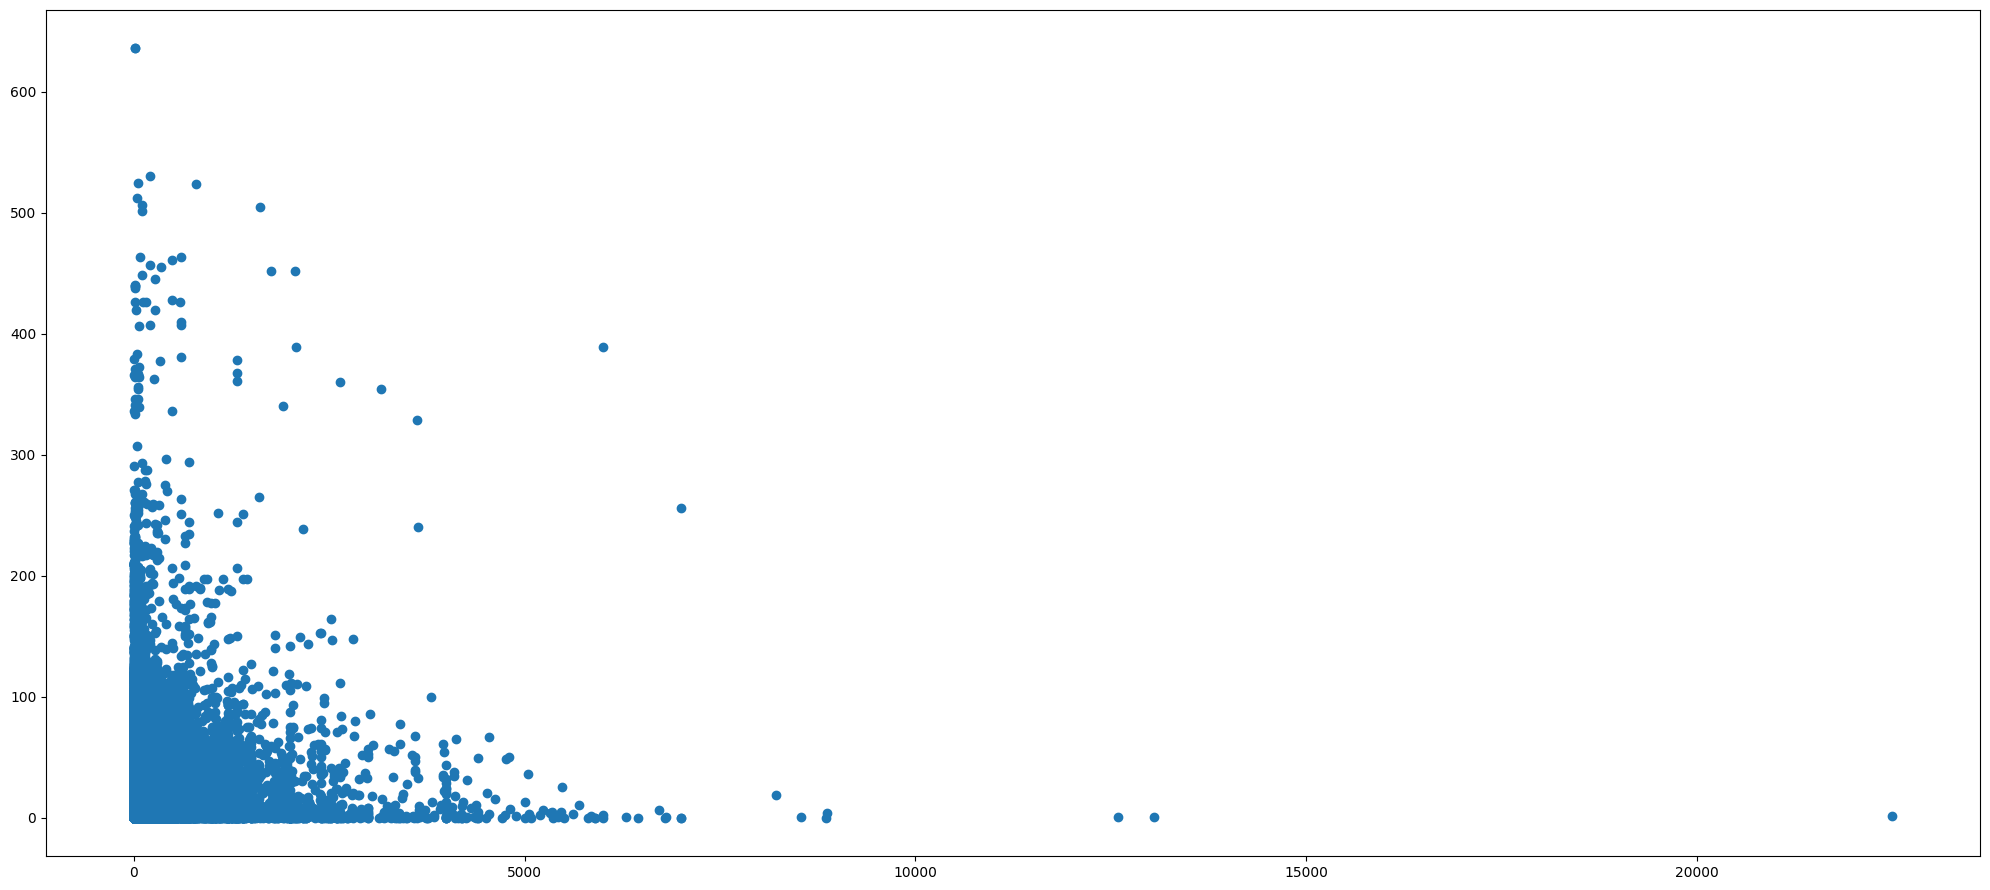

In [12]:
fig = plt.figure(figsize=(20,9))

plt.scatter(power_plants['Capacity (MW)'], power_plants['distance_to_water_km'])

plt.title("")

plt.xlabel("", fontsize=12)

plt.ylabel("", fontsize=12)

plt.tight_layout()

plt.show()

Still working on the population part, and I might not include it. I want to include it as motivation towards why I asked the question in the first place: what power plants lend themselves to what type of geographies?

In [13]:
population_df = pd.read_csv('../final_project/data/population.csv', index_col=0)

In [14]:
population_sample = pd.read_csv('../final_project/data/population_sample.csv', index_col=0)

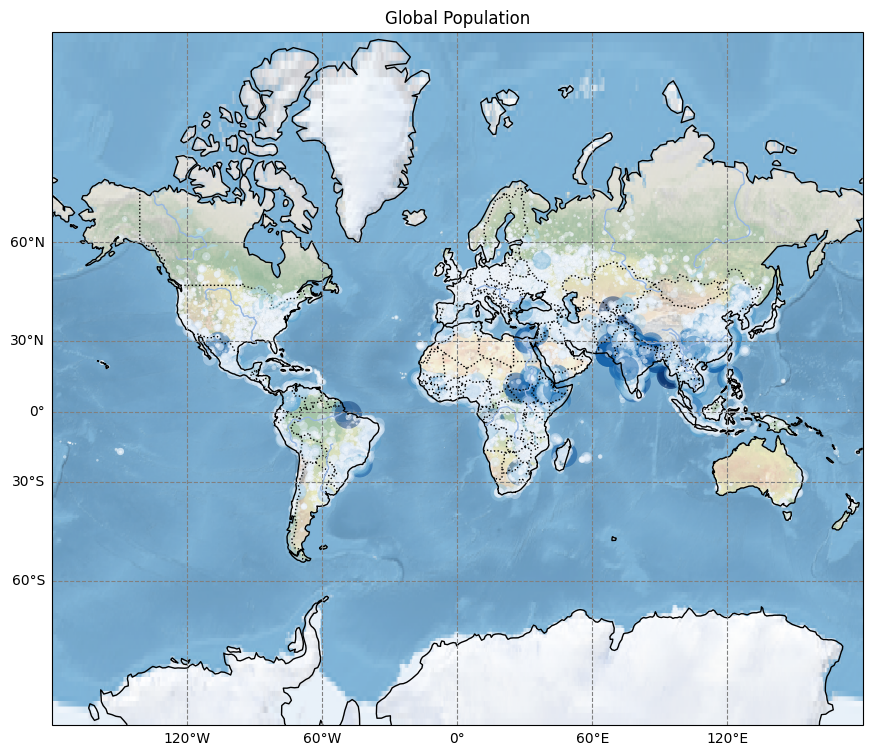

In [15]:
plot_map(f"Global Population",
             population_sample['LONG'],
             population_sample['LAT'],
             c=population_sample['population'],
             labels=None,
             cmap='Blues',
             s=population_sample['population']/100,
             edgecolor='black',
             linewidths=.005,
             alpha=0.5)

In [16]:
population_sample['Longitude'] = population_sample['LONG']

population_sample['Latitude'] = population_sample['LAT']

power_plants['LONGITUDE'] = power_plants['Longitude']

power_plants['LATITUDE'] = power_plants['Latitude']

power_plants_to_population = spatial_merge_left_join(population_sample, power_plants)

power_plants_to_population



longitude      latitude  population        LONG        LAT  \
6776395  1.335439e+07  3.361337e+06       286.0  119.964569  28.887511   
3674609 -1.031141e+07  4.796022e+06         1.0  -92.628931  39.517152   
7632950  4.800321e+06  1.953138e+06       193.0   43.122018  17.277380   
6767970  1.280401e+07  3.227888e+06      2738.0  115.020421  27.832622   
7040086 -1.004965e+07  3.800617e+06       335.0  -90.277534  32.283768   
...               ...           ...         ...         ...        ...   
1232145  5.937006e+04  6.077132e+06         9.0    0.533330  47.821030   
2748225  7.563066e+05  6.248637e+06         7.0    6.794018  48.845210   
3906449 -1.083213e+07  4.386183e+06         1.0  -97.306675  36.619367   
3906449 -1.083213e+07  4.386183e+06         1.0  -97.306675  36.619367   
7829572 -1.757803e+06  1.446549e+06        41.0  -15.790613  12.884582   

         Longitude_left  Latitude_left                     Powerplant Name  \
6776395      119.964569      28.887511         Yongkang Waste Incineration   
3674609      -92.628931      39.517152                         Thomas Hill   
7632950       43.122018      17.277380                               JAZAN   
6767970      115.020421      27.832622          Datang Xinyu power station   
7040086      -90.277534      32.283768  Mississippi Baptist Medical Center   
...                 ...            ...                                 ...   
1232145        0.533330      47.821030                    Thorigné-sur-Dué   
2748225        6.794018      48.845210                            Morhange   
3906449      -97.306675      36.619367                               Ponca   
3906449      -97.306675      36.619367                          Ponca City   
7829572      -15.790613      12.884582                            Boutoute   

          gppd_idnr  Capacity (MW) Primary Fuel  \
6776395  WRI1071895       15.00000          Gas   
3674609  USA0002168     1181.70000         Coal   
7632950  WRI1030658     1520.90000          Oil   
6767970  WRI1070246      440.00000         Coal   
7040086  USA0054203        4.20000          Gas   
...             ...            ...          ...   
1232145  WRI1025001        4.09874        Solar   
2748225  WRI1025475        1.44583        Solar   
3906449  USA0000762       48.00000          Gas   
3906449  USA0007546      134.30000          Gas   
7829572  WRI1023162       19.00000          Oil   

                                               Owner  \
6776395                                          NaN   
3674609                Associated Electric Coop  Inc   
7632950              Saudi Electricity Company (SEC)   
6767970  Datang International Xinyu Power Generation   
7040086                  Mississippi Baptist Medical   
...                                              ...   
1232145                                          NaN   
2748225                                          NaN   
3906449           Oklahoma Municipal Power Authority   
3906449           Oklahoma Municipal Power Authority   
7829572                                          NaN   

                                         Source  distance_to_water_km  \
6776395                     UNFCCC CDM Registry             34.803292   
3674609  U.S. Energy Information Administration             39.775156   
7632950                                    ECRA             11.383211   
6767970                                    GCPT             34.562016   
7040086  U.S. Energy Information Administration              2.298550   
...                                         ...                   ...   
1232145                  Open Power System Data             69.947168   
2748225                  Open Power System Data             40.574975   
3906449  U.S. Energy Information Administration              4.346192   
3906449  U.S. Energy Information Administration              4.346192   
7829572          African Development Bank Group             49.847197   

         Longitude_righ

In [17]:
power_plants_to_population['gppd_idnr'].nunique()

18591

In [18]:
power_plants['gppd_idnr'].nunique()

29910

In [19]:
mw_per_person = power_plants_to_population['Capacity (MW)'] / power_plants_to_population['population']

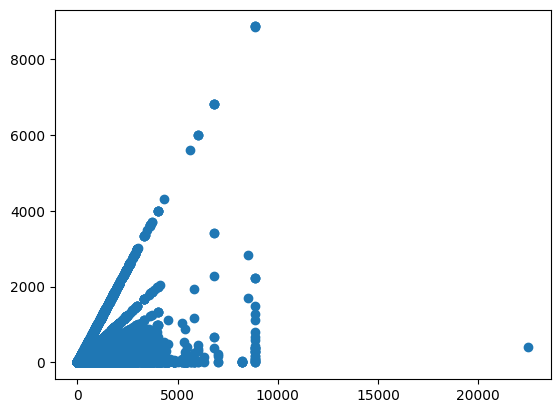

In [20]:
plt.scatter(power_plants_to_population['Capacity (MW)'], mw_per_person)

In [21]:
ncei_atmospheric_raw = pd.read_csv('data/ncei_atmospheric_raw.csv', index_col=0)

ncei_atmospheric_raw

STATION        DATE   LATITUDE  LONGITUDE  ELEVATION  \
0       99471099999  2024-01-01  27.300000     -97.42        4.0   
1       99471099999  2024-02-01  27.300000     -97.42        4.0   
2       99471099999  2024-03-01  27.300000     -97.42        4.0   
3       99471099999  2024-04-01  27.300000     -97.42        4.0   
4       99471099999  2024-05-02  27.300000     -97.42        4.0   
...             ...         ...        ...        ...        ...   
141822  25400099999  2024-08-01  65.733333     150.90       43.0   
141823  25400099999  2024-09-01  65.733333     150.90       43.0   
141824  25400099999  2024-10-01  65.733333     150.90       43.0   
141825  25400099999  2024-11-01  65.733333     150.90       43.0   
141826  25400099999  2024-12-02  65.733333     150.90       43.0   

                                           NAME       TEMP  TEMP_ATTRIBUTES  \
0       068 BAFFIN BAY POINT OF ROCKS TX, TX US  55.030645        22.016129   
1       068 BAFFIN BAY POINT OF ROCKS TX, TX US  61.121053        21.631579   
2       068 BAFFIN BAY POINT OF ROCKS TX, TX US  67.901724        22.293103   
3       068 BAFFIN BAY POINT OF ROCKS TX, TX US  73.383333        21.783333   
4       068 BAFFIN BAY POINT OF ROCKS TX, TX US  79.854098        22.344262   
...                                         ...        ...              ...   
141822                             ZYRYANKA, RS  51.644444         7.870370   
141823                             ZYRYANKA, RS  41.226667         7.833333   
141824                             ZYRYANKA, RS  19.525806         7.870968   
141825                             ZYRYANKA, RS -13.292308         7.923077   
141826                             ZYRYANKA, RS -15.830000         7.866667   

             DEWP  DEWP_ATTRIBUTES  ...        MAX  MAX_ATTRIBUTES        MIN  \
0             NaN         0.000000  ...  61.566129               *  50.375806   
1             NaN         0.000000  ...  67.361404               *  56.510526   
2             NaN         0.000000  ...  73.674138               *  64.208621   
3             NaN         0.000000  ...  76.908333               *  70.298333   
4             NaN         0.000000  ...  82.547541               *  77.262295   
...           ...              ...  ...        ...             ...        ...   
141822  44.362963         7.870370  ...  59.466667                  43.662963   
141823  35.790000         7.800000  ...  47.376667                  35.746667   
141824  13.770968         7.870968  ...  23.800000                  15.229032   
141825 -19.000000         7.923077  ...  -8.953846                 -17.615385   
141826 -21.586667         7.866667  ... -11.620000                 -21.396667   

        MIN_ATTRIBUTES      PRCP  PRCP_ATTRIBUTES       SNDP  FRSHTT  \
0                    *  0.000000                I        NaN       0   
1                    *  0.000000                I        NaN       0   
2                    *  0.000000                I        NaN       0   
3                    *  0.000000                I        NaN       0   
4                    *  0.000000                I        NaN       0   
...                ...       ...              ...        ...     ...   
141822                  0.118333                F        NaN       0   
141823                  0.074000                E        NaN   10000   
141824                  0.067667                F   7.752174       0   
141825                  0.011200                F  11.175000    1000   
141826                  0.032667                E  13.618519    1000   

          DATETIME  MONTH  
0       2024-01-01      1  
1       2024-02-01      2  
2       2024-03-01      3  
3       2024-04-01      4  
4       2024-05-02      5  
...            ...    ...  
141822  2024-08-01      8  
141823  2024-09-01      9  
141824  2024-10-01     10  
141825  2024-11-01     11  
141826  2024-12-02     12  

[141827 rows x 30 columns]

In [22]:
full_atmospheric_w_id = ncei_atmospheric.merge(ncei_stations_id, on='NAME', how='left')

full_atmospheric_w_id

NAME     1_TEMP     2_TEMP  \
0      068 BAFFIN BAY POINT OF ROCKS TX, TX US  55.030645  61.121053   
1                  9014098 FORT GRATIOT MI, US  24.872581  29.710714   
2                        9052030 OSWEGO NY, US  27.512903  30.026786   
3                       9063020 BUFFALO NY, US  27.285484  29.584211   
4                  9075014 HARBOR BEACH MI, US  24.391935  28.058929   
...                                        ...        ...        ...   
12545                             ZUZ AGAC, KZ  15.324194  10.101754   
12546                            ZVARTNOTS, AM  32.725806  35.492982   
12547                   ZWERNDORF MARCHEGG, AU  34.679032  40.815789   
12548                           ZYRJANOVSK, KZ   0.174194  -6.657895   
12549                             ZYRYANKA, RS -36.398387 -28.824561   

          3_TEMP     4_TEMP     5_TEMP     6_TEMP     7_TEMP     8_TEMP  \
0      67.901724  73.383333  79.854098  83.390000  82.854839  84.477778   
1      39.132759  46.596491  55.336066  67.819643  71.725806  71.140741   
2      39.381034  46.408929  57.111475  67.585000  73.332258  70.574074   
3      37.920690  45.516667  57.940984  67.696667  73.688710  71.751852   
4      35.505172  43.260000  51.595082  63.859322  69.646774  69.653704   
...          ...        ...        ...        ...        ...        ...   
12545  31.634483  54.991379  66.526230  78.343333  78.760656  75.285185   
12546  47.843103  59.543333  65.206557  76.141667  81.319355  83.433333   
12547  46.835714  54.405000  58.822414  69.423729  71.670968  72.142593   
12548  15.960345  42.058621  57.152459  67.063333  67.722581  62.970370   
12549  -9.381034  21.955172  44.726230  56.911667  59.704839  51.644444   

          9_TEMP  ...    8_PRCP  9_PRCP   10_PRCP   11_PRCP   12_PRCP  labels  \
0      81.543333  ...  0.000000   0.000  0.000000  0.000000  0.000000       1   
1      66.320000  ...  0.000000   0.000  0.000000  0.000000  0.000000      23   
2      65.746667  ...  0.000000   0.000  0.000000  0.000000  0.000000      23   
3      67.973333  ...  0.000000   0.000  0.000000  0.000000  0.000000      23   
4      65.363333  ...  0.000000   0.000  0.000000  0.000000  0.000000      23   
...          ...  ...       ...     ...       ...       ...       ...     ...   
12545  57.006667  ...  0.000000   0.000  0.000000  0.000000  0.000000      10   
12546  72.013333  ...  0.000000   0.000  0.000000  0.000000  0.000000      10   
12547  63.316667  ...  0.034074   0.223  0.056774  0.005789  0.016000       5   
12548  47.553333  ...  0.000000   0.000  0.000000  0.000000  0.000000      23   
12549  41.226667  ...  0.118333   0.074  0.067667  0.011200  0.032667       3   

           STATION   LATITUDE   LONGITUDE  ELEVATION  
0      99471099999  27.300000  -97.420000       4.00  
1      99725899999  43.010000  -82.420000     180.10  
2      99726499999  43.460000  -76.510000      78.00  
3      99725499999  42.880000  -78.890000     178.30  
4      99726099999  43.850000  -82.640000     179.20  
...            ...        ...         ...        ...  
12545  36619099999  47.083000   79.717000     422.00  
12546  35394699999  40.147275   44.395881     865.02  
12547  11085099999  48.333333   16.833333     146.00  
12548  36421099999  49.750000   84.283000     492.00  
12549  25400099999  65.733333  150.900000      43.00  

[12550 rows x 138 columns]

In [23]:
ncei_atmospheric_raw['DATETIME'] = pd.to_datetime(ncei_atmospheric_raw['DATE'])

ncei_atmospheric_raw

STATION        DATE   LATITUDE  LONGITUDE  ELEVATION  \
0       99471099999  2024-01-01  27.300000     -97.42        4.0   
1       99471099999  2024-02-01  27.300000     -97.42        4.0   
2       99471099999  2024-03-01  27.300000     -97.42        4.0   
3       99471099999  2024-04-01  27.300000     -97.42        4.0   
4       99471099999  2024-05-02  27.300000     -97.42        4.0   
...             ...         ...        ...        ...        ...   
141822  25400099999  2024-08-01  65.733333     150.90       43.0   
141823  25400099999  2024-09-01  65.733333     150.90       43.0   
141824  25400099999  2024-10-01  65.733333     150.90       43.0   
141825  25400099999  2024-11-01  65.733333     150.90       43.0   
141826  25400099999  2024-12-02  65.733333     150.90       43.0   

                                           NAME       TEMP  TEMP_ATTRIBUTES  \
0       068 BAFFIN BAY POINT OF ROCKS TX, TX US  55.030645        22.016129   
1       068 BAFFIN BAY POINT OF ROCKS TX, TX US  61.121053        21.631579   
2       068 BAFFIN BAY POINT OF ROCKS TX, TX US  67.901724        22.293103   
3       068 BAFFIN BAY POINT OF ROCKS TX, TX US  73.383333        21.783333   
4       068 BAFFIN BAY POINT OF ROCKS TX, TX US  79.854098        22.344262   
...                                         ...        ...              ...   
141822                             ZYRYANKA, RS  51.644444         7.870370   
141823                             ZYRYANKA, RS  41.226667         7.833333   
141824                             ZYRYANKA, RS  19.525806         7.870968   
141825                             ZYRYANKA, RS -13.292308         7.923077   
141826                             ZYRYANKA, RS -15.830000         7.866667   

             DEWP  DEWP_ATTRIBUTES  ...        MAX  MAX_ATTRIBUTES        MIN  \
0             NaN         0.000000  ...  61.566129               *  50.375806   
1             NaN         0.000000  ...  67.361404               *  56.510526   
2             NaN         0.000000  ...  73.674138               *  64.208621   
3             NaN         0.000000  ...  76.908333               *  70.298333   
4             NaN         0.000000  ...  82.547541               *  77.262295   
...           ...              ...  ...        ...             ...        ...   
141822  44.362963         7.870370  ...  59.466667                  43.662963   
141823  35.790000         7.800000  ...  47.376667                  35.746667   
141824  13.770968         7.870968  ...  23.800000                  15.229032   
141825 -19.000000         7.923077  ...  -8.953846                 -17.615385   
141826 -21.586667         7.866667  ... -11.620000                 -21.396667   

        MIN_ATTRIBUTES      PRCP  PRCP_ATTRIBUTES       SNDP  FRSHTT  \
0                    *  0.000000                I        NaN       0   
1                    *  0.000000                I        NaN       0   
2                    *  0.000000                I        NaN       0   
3                    *  0.000000                I        NaN       0   
4                    *  0.000000                I        NaN       0   
...                ...       ...              ...        ...     ...   
141822                  0.118333                F        NaN       0   
141823                  0.074000                E        NaN   10000   
141824                  0.067667                F   7.752174       0   
141825                  0.011200                F  11.175000    1000   
141826                  0.032667                E  13.618519    1000   

         DATETIME  MONTH  
0      2024-01-01      1  
1      2024-02-01      2  
2      2024-03-01      3  
3      2024-04-01      4  
4      2024-05-02      5  
...           ...    ...  
141822 2024-08-01      8  
141823 2024-09-01      9  
141824 2024-10-01     10  
141825 2024-11-01     11  
141826 2024-12-02     12  

[141827 rows x 30 columns]

In [24]:
ncei_atmospheric_raw['MONTH'] = ncei_atmospheric_raw['DATETIME'].dt.month

ncei_atmospheric_raw

STATION        DATE   LATITUDE  LONGITUDE  ELEVATION  \
0       99471099999  2024-01-01  27.300000     -97.42        4.0   
1       99471099999  2024-02-01  27.300000     -97.42        4.0   
2       99471099999  2024-03-01  27.300000     -97.42        4.0   
3       99471099999  2024-04-01  27.300000     -97.42        4.0   
4       99471099999  2024-05-02  27.300000     -97.42        4.0   
...             ...         ...        ...        ...        ...   
141822  25400099999  2024-08-01  65.733333     150.90       43.0   
141823  25400099999  2024-09-01  65.733333     150.90       43.0   
141824  25400099999  2024-10-01  65.733333     150.90       43.0   
141825  25400099999  2024-11-01  65.733333     150.90       43.0   
141826  25400099999  2024-12-02  65.733333     150.90       43.0   

                                           NAME       TEMP  TEMP_ATTRIBUTES  \
0       068 BAFFIN BAY POINT OF ROCKS TX, TX US  55.030645        22.016129   
1       068 BAFFIN BAY POINT OF ROCKS TX, TX US  61.121053        21.631579   
2       068 BAFFIN BAY POINT OF ROCKS TX, TX US  67.901724        22.293103   
3       068 BAFFIN BAY POINT OF ROCKS TX, TX US  73.383333        21.783333   
4       068 BAFFIN BAY POINT OF ROCKS TX, TX US  79.854098        22.344262   
...                                         ...        ...              ...   
141822                             ZYRYANKA, RS  51.644444         7.870370   
141823                             ZYRYANKA, RS  41.226667         7.833333   
141824                             ZYRYANKA, RS  19.525806         7.870968   
141825                             ZYRYANKA, RS -13.292308         7.923077   
141826                             ZYRYANKA, RS -15.830000         7.866667   

             DEWP  DEWP_ATTRIBUTES  ...        MAX  MAX_ATTRIBUTES        MIN  \
0             NaN         0.000000  ...  61.566129               *  50.375806   
1             NaN         0.000000  ...  67.361404               *  56.510526   
2             NaN         0.000000  ...  73.674138               *  64.208621   
3             NaN         0.000000  ...  76.908333               *  70.298333   
4             NaN         0.000000  ...  82.547541               *  77.262295   
...           ...              ...  ...        ...             ...        ...   
141822  44.362963         7.870370  ...  59.466667                  43.662963   
141823  35.790000         7.800000  ...  47.376667                  35.746667   
141824  13.770968         7.870968  ...  23.800000                  15.229032   
141825 -19.000000         7.923077  ...  -8.953846                 -17.615385   
141826 -21.586667         7.866667  ... -11.620000                 -21.396667   

        MIN_ATTRIBUTES      PRCP  PRCP_ATTRIBUTES       SNDP  FRSHTT  \
0                    *  0.000000                I        NaN       0   
1                    *  0.000000                I        NaN       0   
2                    *  0.000000                I        NaN       0   
3                    *  0.000000                I        NaN       0   
4                    *  0.000000                I        NaN       0   
...                ...       ...              ...        ...     ...   
141822                  0.118333                F        NaN       0   
141823                  0.074000                E        NaN   10000   
141824                  0.067667                F   7.752174       0   
141825                  0.011200                F  11.175000    1000   
141826                  0.032667                E  13.618519    1000   

         DATETIME  MONTH  
0      2024-01-01      1  
1      2024-02-01      2  
2      2024-03-01      3  
3      2024-04-01      4  
4      2024-05-02      5  
...           ...    ...  
141822 2024-08-01      8  
141823 2024-09-01      9  
141824 2024-10-01     10  
141825 2024-11-01     11  
141826 2024-12-02     12  

[141827 rows x 30 columns]

In [25]:
ncei_atmospheric_raw[ncei_atmospheric_raw==999.9] = 999.9

ncei_atmospheric_raw[ncei_atmospheric_raw==9999.9] = 999.9

ncei_atmospheric_raw

STATION        DATE   LATITUDE  LONGITUDE  ELEVATION  \
0       99471099999  2024-01-01  27.300000     -97.42        4.0   
1       99471099999  2024-02-01  27.300000     -97.42        4.0   
2       99471099999  2024-03-01  27.300000     -97.42        4.0   
3       99471099999  2024-04-01  27.300000     -97.42        4.0   
4       99471099999  2024-05-02  27.300000     -97.42        4.0   
...             ...         ...        ...        ...        ...   
141822  25400099999  2024-08-01  65.733333     150.90       43.0   
141823  25400099999  2024-09-01  65.733333     150.90       43.0   
141824  25400099999  2024-10-01  65.733333     150.90       43.0   
141825  25400099999  2024-11-01  65.733333     150.90       43.0   
141826  25400099999  2024-12-02  65.733333     150.90       43.0   

                                           NAME       TEMP  TEMP_ATTRIBUTES  \
0       068 BAFFIN BAY POINT OF ROCKS TX, TX US  55.030645        22.016129   
1       068 BAFFIN BAY POINT OF ROCKS TX, TX US  61.121053        21.631579   
2       068 BAFFIN BAY POINT OF ROCKS TX, TX US  67.901724        22.293103   
3       068 BAFFIN BAY POINT OF ROCKS TX, TX US  73.383333        21.783333   
4       068 BAFFIN BAY POINT OF ROCKS TX, TX US  79.854098        22.344262   
...                                         ...        ...              ...   
141822                             ZYRYANKA, RS  51.644444         7.870370   
141823                             ZYRYANKA, RS  41.226667         7.833333   
141824                             ZYRYANKA, RS  19.525806         7.870968   
141825                             ZYRYANKA, RS -13.292308         7.923077   
141826                             ZYRYANKA, RS -15.830000         7.866667   

             DEWP  DEWP_ATTRIBUTES  ...        MAX  MAX_ATTRIBUTES        MIN  \
0             NaN         0.000000  ...  61.566129               *  50.375806   
1             NaN         0.000000  ...  67.361404               *  56.510526   
2             NaN         0.000000  ...  73.674138               *  64.208621   
3             NaN         0.000000  ...  76.908333               *  70.298333   
4             NaN         0.000000  ...  82.547541               *  77.262295   
...           ...              ...  ...        ...             ...        ...   
141822  44.362963         7.870370  ...  59.466667                  43.662963   
141823  35.790000         7.800000  ...  47.376667                  35.746667   
141824  13.770968         7.870968  ...  23.800000                  15.229032   
141825 -19.000000         7.923077  ...  -8.953846                 -17.615385   
141826 -21.586667         7.866667  ... -11.620000                 -21.396667   

        MIN_ATTRIBUTES      PRCP  PRCP_ATTRIBUTES       SNDP  FRSHTT  \
0                    *  0.000000                I        NaN       0   
1                    *  0.000000                I        NaN       0   
2                    *  0.000000                I        NaN       0   
3                    *  0.000000                I        NaN       0   
4                    *  0.000000                I        NaN       0   
...                ...       ...              ...        ...     ...   
141822                  0.118333                F        NaN       0   
141823                  0.074000                E        NaN   10000   
141824                  0.067667                F   7.752174       0   
141825                  0.011200                F  11.175000    1000   
141826                  0.032667                E  13.618519    1000   

         DATETIME  MONTH  
0      2024-01-01      1  
1      2024-02-01      2  
2      2024-03-01      3  
3      2024-04-01      4  
4      2024-05-02      5  
...           ...    ...  
141822 2024-08-01      8  
141823 2024-09-01      9  
141824 2024-10-01     10  
141825 2024-11-01     11  
141826 2024-12-02     12  

[141827 rows x 30 columns]

In [26]:
aggregate_function = {'STATION' : 'first',
                'DATE'    : 'first',
                'LATITUDE' : 'mean',
                'LONGITUDE' : 'mean',
                'ELEVATION' : 'mean',
                'NAME' : 'first',
                'TEMP' : 'mean',
                'TEMP_ATTRIBUTES' : 'mean',
                'DEWP' : 'mean',
                'DEWP_ATTRIBUTES' : 'mean',
                'SLP' : 'mean',
                'SLP_ATTRIBUTES' : 'mean',
                'STP' : 'mean',
                'STP_ATTRIBUTES' : 'mean',
                'VISIB' : 'mean',
                'VISIB_ATTRIBUTES' : 'mean',
                'WDSP' : 'mean',
                'WDSP_ATTRIBUTES' : 'mean',
                'MXSPD' : 'mean',
                'GUST' : 'mean',
                'MAX' : 'mean',
                'MAX_ATTRIBUTES' : 'first',
                'MIN' : 'mean',
                'MIN_ATTRIBUTES' : 'first',
                'PRCP' : 'mean',
                'PRCP_ATTRIBUTES' : 'first',
                'SNDP' : 'mean',
                'FRSHTT' : 'first',
                'DATETIME' : 'first',
                'MONTH' : 'first'}

In [27]:
ncei_atmospheric_aggregate = ncei_atmospheric_raw.groupby(['NAME', 'MONTH']).agg(aggregate_function)
#data quality issue
ncei_atmospheric_aggregate = ncei_atmospheric_aggregate.fillna(0)

ncei_atmospheric_aggregate

STATION        DATE  \
NAME                                    MONTH                            
068 BAFFIN BAY POINT OF ROCKS TX, TX US 1      99471099999  2024-01-01   
                                        2      99471099999  2024-02-01   
                                        3      99471099999  2024-03-01   
                                        4      99471099999  2024-04-01   
                                        5      99471099999  2024-05-02   
...                                                    ...         ...   
ZYRYANKA, RS                            8      25400099999  2024-08-01   
                                        9      25400099999  2024-09-01   
                                        10     25400099999  2024-10-01   
                                        11     25400099999  2024-11-01   
                                        12     25400099999  2024-12-02   

                                                LATITUDE  LONGITUDE  \
NAME                                    MONTH                         
068 BAFFIN BAY POINT OF ROCKS TX, TX US 1      27.300000     -97.42   
                                        2      27.300000     -97.42   
                                        3      27.300000     -97.42   
                                        4      27.300000     -97.42   
                                        5      27.300000     -97.42   
...                                                  ...        ...   
ZYRYANKA, RS                            8      65.733333     150.90   
                                        9      65.733333     150.90   
                                        10     65.733333     150.90   
                                        11     65.733333     150.90   
                                        12     65.733333     150.90   

                                               ELEVATION  \
NAME                                    MONTH              
068 BAFFIN BAY POINT OF ROCKS TX, TX US 1            4.0   
                                        2            4.0   
                                        3            4.0   
                                        4            4.0   
                                        5            4.0   
...                                                  ...   
ZYRYANKA, RS                            8           43.0   
                                        9           43.0   
                                        10          43.0   
                                        11          43.0   
                                        12          43.0   

                                                                                  NAME  \
NAME                                    MONTH                                            
068 BAFFIN BAY POINT OF ROCKS TX, TX US 1      068 BAFFIN BAY POINT OF ROCKS TX, TX US   
                                        2      068 BAFFIN BAY POINT OF ROCKS TX, TX US   
                                        3      068 BAFFIN BAY POINT OF ROCKS TX, TX US   
                                        4      068 BAFFIN BAY POINT OF ROCKS TX, TX US   
                                        5      068 BAFFIN BAY POINT OF ROCKS TX, TX US   
...                                                                                ...   
ZYRYANKA, RS                            8                                 ZYRYANKA, RS   
                                        9                                 ZYRYANKA, RS   
                                        10                                ZYRYANKA, RS   
                                        11                                ZYRYANKA, RS   
                                        12                                ZYRYANKA, RS   

                                                    TEMP  TEMP_ATTRIBUTES  \
NAME                                    MONTH                               
068 BAFFIN BAY POINT OF ROCKS TX, TX US 1      55.030645  

<h4>Temperature</h4>
The rainforest biome remains warm all year and must stay frost-free. The average daily temperatures range from 20°C (68°F) to 25°C (77°F).

<h4>Precipitation</h4>
Rainforests receive the most rain of all of the biomes in a year! A typical year sees 2,000 to 10,000 millimeters (79 to 394 inches) of rain per year.

https://earthobservatory.nasa.gov/biome/biorainforest.php

In [28]:
ncei_atmospheric_temp_precip = ncei_atmospheric_aggregate.groupby(level='NAME').agg(
    Min_Temp_F=('TEMP', 'min'),
    Min_Precip_In=('PRCP', 'min')
)

ncei_atmospheric_temp_precip

Min_Temp_F  Min_Precip_In
NAME                                                              
068 BAFFIN BAY POINT OF ROCKS TX, TX US   55.030645       0.000000
9014098 FORT GRATIOT MI, US               24.872581       0.000000
9052030 OSWEGO NY, US                     27.512903       0.000000
9063020 BUFFALO NY, US                    27.285484       0.000000
9075014 HARBOR BEACH MI, US               24.391935       0.000000
...                                             ...            ...
ZUZ AGAC, KZ                              10.101754       0.000000
ZVARTNOTS, AM                             32.725806       0.000000
ZWERNDORF MARCHEGG, AU                    34.679032       0.005789
ZYRJANOVSK, KZ                            -6.657895       0.000000
ZYRYANKA, RS                             -36.398387       0.007377

[12550 rows x 2 columns]

In [29]:
tropical_rainforest_temperature = (ncei_atmospheric_temp_precip['Min_Precip_In'] > 0.079)

tropical_rainforest_precipitation = (ncei_atmospheric_temp_precip['Min_Temp_F'] > 68)

tropical_rainforests_df = ncei_atmospheric_temp_precip[tropical_rainforest_temperature &
                                                       tropical_rainforest_precipitation]

tropical_rainforests_df

Min_Temp_F  Min_Precip_In
NAME                                                                        
APIA UPOLU ISLAND, WS                               79.579630       0.090185
AUKI, BP                                            79.956250       0.154643
BABELTHUAP KOROR AIRPORT, PW PS                     81.059649       0.226780
BAHIR DAR, ET                                       69.900000       0.120000
BALER RADAR, RP                                     75.838710       0.116885
...                                                       ...            ...
VAL DE CANS JULIO CEZAR RIBEIRO INTERNATIONAL, BR   79.160714       0.210323
YAGOUA CITY, CM                                     78.766667       0.143333
YALINGA, CT                                         76.600000       1.340000
YAP ISLAND WEATHER SERVICE OFFICE AIRPORT, FM FM    81.756667       0.094677
YOKO, CM                                            69.981818       0.122727

[116 rows x 2 columns]

In [30]:
ncei_atmospheric_aggregate.reset_index(drop=True,inplace=True)

In [31]:
ncei_atmospheric_aggregate.to_csv('data/ncei_atmospheric_aggregate.csv')

In [32]:
tropical_rainforests_df = tropical_rainforests_df.merge(ncei_atmospheric_aggregate.groupby('NAME').head(1),
                                                        on='NAME',
                                                        how='inner')

tropical_rainforests_df

NAME  Min_Temp_F  \
0                                APIA UPOLU ISLAND, WS   79.579630   
1                                             AUKI, BP   79.956250   
2                      BABELTHUAP KOROR AIRPORT, PW PS   81.059649   
3                                        BAHIR DAR, ET   69.900000   
4                                      BALER RADAR, RP   75.838710   
..                                                 ...         ...   
111  VAL DE CANS JULIO CEZAR RIBEIRO INTERNATIONAL, BR   79.160714   
112                                    YAGOUA CITY, CM   78.766667   
113                                        YALINGA, CT   76.600000   
114   YAP ISLAND WEATHER SERVICE OFFICE AIRPORT, FM FM   81.756667   
115                                           YOKO, CM   69.981818   

     Min_Precip_In      STATION        DATE   LATITUDE   LONGITUDE  ELEVATION  \
0         0.090185  91762099999  2024-01-01 -13.800000 -171.783333       2.00   
1         0.154643  91507099999  2024-01-05  -8.783333  160.733333      11.00   
2         0.226780  91408040310  2024-01-01   7.367220  134.544170      53.60   
3         0.120000  63332099999  2024-07-17  11.608075   37.321644    1822.09   
4         0.116885  98334099999  2024-01-01  15.750000  121.633333     178.00   
..             ...          ...         ...        ...         ...        ...   
111       0.210323  82193099999  2025-01-01  -1.379250  -48.476292      16.45   
112       0.143333  64851499999  2024-09-07  10.367000   15.233000     326.00   
113       1.340000  64661099999  2025-03-08   6.500000   23.266667     602.00   
114       0.094677  91413040308  2024-01-01   9.483330  138.083330      13.40   
115       0.122727  64900099999  2025-07-11   5.550000   12.366667    1031.00   

          TEMP  TEMP_ATTRIBUTES  ...        MAX  MAX_ATTRIBUTES        MIN  \
0    81.937097         7.629032  ...  87.283871                  76.238710   
1    82.355102         5.448980  ...  86.693878               *  78.446939   
2    81.519355        24.000000  ...  86.909677                  76.337097   
3    69.900000         4.666667  ...  75.933333               *  59.300000   
4    75.838710         7.838710  ...  83.019355                  70.937097   
..         ...              ...  ...        ...             ...        ...   
111  79.812903        23.935484  ...  87.448387               *  75.319355   
112  78.766667         4.000000  ...  89.466667                  74.083333   
113  76.600000         4.000000  ...  80.100000                  72.500000   
114  82.251613        23.693548  ...  87.196774               *  78.122581   
115  69.981818         5.454545  ...  77.063636                  66.763636   

     MIN_ATTRIBUTES      PRCP  PRCP_ATTRIBUTES  SNDP  FRSHTT   DATETIME  MONTH  
0                    0.642419                G   0.0       0 2024-01-01      1  
1                 *  0.700204                G   0.0   10000 2024-01-05      1  
2                    0.401639                G   0.0       0 2024-01-01      1  
3                    0.210000                G   0.0       0 2024-07-17      7  
4                    0.116885                A   0.0       0 2024-01-01      1  
..              ...       ...              ...   ...     ...        ...    ...  
111               *  0.252105                H   0.0   10000 2025-01-01      1  
112                  0.143333                G   0.0       0 2024-09-07      9  
113                  1.340000                E   0.0      10 2025-03-08      3  
114                  0.128387                G   0.0   10000 2024-01-01      1  
115                  0.122727                G   0.0       0 2025-07-11      7  

[116 rows x 32 columns]

In [33]:
full_atmospheric_w_id.to_csv('data/full_atmospheric_w_id.csv')

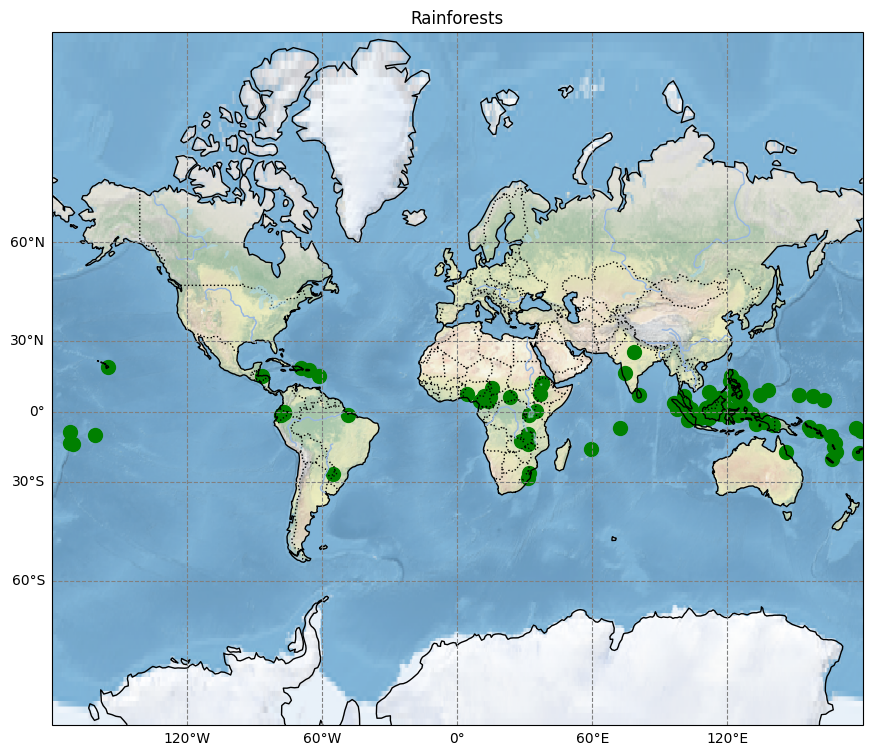

In [34]:
plot_map('Rainforests',
         tropical_rainforests_df['LONGITUDE'],
         tropical_rainforests_df['LATITUDE'],
         c='green',
         labels=None,
         cmap=False,
         s=100)

<center><h4>NASA Rainforest Map</h4></center>
<img src='data/nasa-map-rainforest.jpg'></img>

<h3>Step 2: Unsupervised Feature Discovery</h3>

Use unsupervised learning to discover features that will improve your predictions. You must complete ONE of these (you may do both if you wish, but must fully complete at least one):

<h4>Option A: Clustering</h4>
Try at least 3-4 different values of k (e.g., k=2, 3, 4, 5) and use the elbow method or silhouette scores to select the optimal number<br>
Use the elbow method or silhouette scores to help decide<br>
Minimum 4 visualizations required:<br>

[x]Elbow plot or silhouette plot<br>
[x]Scatter plot showing your final clusters (color-coded)<br>
[x]At least 2 additional visualizations comparing clusters (box plots, bar charts, heatmaps showing cluster characteristics)<br>
[ ]Describe each cluster: What makes this group different? Give them meaningful names that reflect their characteristics. Think ahead: How might cluster membership help you predict your target variable in Phase 2?<br>

Examples of good cluster names:<br>

✅ "Budget-conscious families" (not "Cluster 1")<br>
✅ "Premium business travelers" (not "High-value customers")<br>
✅ "Occasional weekend shoppers" (not "Low-frequency segment")<br>
Examples of poor cluster names:<br>

❌ "Cluster 1", "Cluster 2"<br>
❌ "High-value customers" (too generic)<br>
❌ "Group A" (not descriptive)<br>

Critical Requirement: You must explain what you discovered in words a non-technical person would understand. What hidden groups or patterns exist in your data? Most importantly: How will these discoveries help you make better predictions?<br>

Important Note: If your initial unsupervised analysis doesn't reveal clear patterns, document this! Try different preprocessing (scaling, feature selection) or different methods. Sometimes discovering "no clear patterns" is valuable learning. Explain why patterns might not exist in your data and what this means for your predictive models.<br>

In [35]:
# --- 1. Pivot the 'TEMP' column ---
temp_pivot = ncei_atmospheric_aggregate.pivot_table(
    index='NAME',       # The row labels will be the station names
    columns='MONTH',    # The new columns will be the month numbers (1-12)
    values='TEMP',      # The data to fill the cells will come from the 'TEMP' column
    aggfunc='mean'      # If a station has multiple entries for a month, take the average
)

temp_pivot.columns = [str(i)+'_TEMP' for i in range(1,13)]

print("Temperature Pivot Table:")
print(temp_pivot.head())

# --- 2. Pivot the 'PRCP' column ---
precip_pivot = ncei_atmospheric_aggregate.pivot_table(
    index='NAME',       # Row labels
    columns='MONTH',    # Column labels (1-12)
    values='PRCP',      # Data to fill cells
    aggfunc='mean'       # Typically aggregate precipitation by summing the month's total
)

precip_pivot.columns = [str(i)+'_PRCP' for i in range(1,13)]

print("\nPrecipitation Pivot Table:")
print(precip_pivot.head())


Temperature Pivot Table:
                                            1_TEMP     2_TEMP     3_TEMP  \
NAME                                                                       
068 BAFFIN BAY POINT OF ROCKS TX, TX US  55.030645  61.121053  67.901724   
9014098 FORT GRATIOT MI, US              24.872581  29.710714  39.132759   
9052030 OSWEGO NY, US                    27.512903  30.026786  39.381034   
9063020 BUFFALO NY, US                   27.285484  29.584211  37.920690   
9075014 HARBOR BEACH MI, US              24.391935  28.058929  35.505172   

                                            4_TEMP     5_TEMP     6_TEMP  \
NAME                                                                       
068 BAFFIN BAY POINT OF ROCKS TX, TX US  73.383333  79.854098  83.390000   
9014098 FORT GRATIOT MI, US              46.596491  55.336066  67.819643   
9052030 OSWEGO NY, US                    46.408929  57.111475  67.585000   
9063020 BUFFALO NY, US                   45.516667  57.940984 

In [36]:
# data quality issue
monthly_pivot = pd.concat([temp_pivot, 
                           precip_pivot], axis=1)
# data quality issue
monthly_pivot = monthly_pivot[~np.isnan(monthly_pivot).any(axis=1)]

monthly_pivot

1_TEMP     2_TEMP     3_TEMP  \
NAME                                                                       
068 BAFFIN BAY POINT OF ROCKS TX, TX US  55.030645  61.121053  67.901724   
9014098 FORT GRATIOT MI, US              24.872581  29.710714  39.132759   
9052030 OSWEGO NY, US                    27.512903  30.026786  39.381034   
9063020 BUFFALO NY, US                   27.285484  29.584211  37.920690   
9075014 HARBOR BEACH MI, US              24.391935  28.058929  35.505172   
...                                            ...        ...        ...   
ZUZ AGAC, KZ                             15.324194  10.101754  31.634483   
ZVARTNOTS, AM                            32.725806  35.492982  47.843103   
ZWERNDORF MARCHEGG, AU                   34.679032  40.815789  46.835714   
ZYRJANOVSK, KZ                            0.174194  -6.657895  15.960345   
ZYRYANKA, RS                            -36.398387 -28.824561  -9.381034   

                                            4_TEMP     5_TEMP     6_TEMP  \
NAME                                                                       
068 BAFFIN BAY POINT OF ROCKS TX, TX US  73.383333  79.854098  83.390000   
9014098 FORT GRATIOT MI, US              46.596491  55.336066  67.819643   
9052030 OSWEGO NY, US                    46.408929  57.111475  67.585000   
9063020 BUFFALO NY, US                   45.516667  57.940984  67.696667   
9075014 HARBOR BEACH MI, US              43.260000  51.595082  63.859322   
...                                            ...        ...        ...   
ZUZ AGAC, KZ                             54.991379  66.526230  78.343333   
ZVARTNOTS, AM                            59.543333  65.206557  76.141667   
ZWERNDORF MARCHEGG, AU                   54.405000  58.822414  69.423729   
ZYRJANOVSK, KZ                           42.058621  57.152459  67.063333   
ZYRYANKA, RS                             21.955172  44.726230  56.911667   

                                            7_TEMP     8_TEMP     9_TEMP  \
NAME                                                                       
068 BAFFIN BAY POINT OF ROCKS TX, TX US  82.854839  84.477778  81.543333   
9014098 FORT GRATIOT MI, US              71.725806  71.140741  66.320000   
9052030 OSWEGO NY, US                    73.332258  70.574074  65.746667   
9063020 BUFFALO NY, US                   73.688710  71.751852  67.973333   
9075014 HARBOR BEACH MI, US              69.646774  69.653704  65.363333   
...                                            ...        ...        ...   
ZUZ AGAC, KZ                             78.760656  75.285185  57.006667   
ZVARTNOTS, AM                            81.319355  83.433333  72.013333   
ZWERNDORF MARCHEGG, AU                   71.670968  72.142593  63.316667   
ZYRJANOVSK, KZ                           67.722581  62.970370  47.553333   
ZYRYANKA, RS                             59.704839  51.644444  41.226667   

                                           10_TEMP  ...    3_PRCP   4_PRCP  \
NAME                                                ...                      
068 BAFFIN BAY POINT OF ROCKS TX, TX US  78.416129  ...  0.000000  0.00000   
9014098 FORT GRATIOT MI, US              55.554839  ...  0.000000  0.00000   
9052030 OSWEGO NY, US                    55.070968  ...  0.000000  0.00000   
9063020 BUFFALO NY, US                   55.941935  ...  0.000000  0.00000   
9075014 HARBOR BEACH MI, US              56.019355  ...  0.000000  0.00000   
...                                            ...  ...       ...      ...   
ZUZ AGAC, KZ                             47.693548  ...  0.000000  0.00000   
ZVARTNOTS, AM                            55.758065  ...  0.000000  0.00000   
ZWERNDORF MARCHEGG, AU                   53.529032  ...  0.044286  0.04400   
ZYRJANOVSK, KZ                           41.222581  ...  0.000000  0.00000   
ZYRYANKA, RS                             19.525806  ...  0.016842  0.01431   

                                           5_PRCP    6_PRCP   

In [37]:
k_range = range(1, 35)

wcss = []

for n_clusters in k_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    kmeans.fit(monthly_pivot)
    wcss.append(kmeans.inertia_)
    
silhouette_scores = []

k_range_silhouette = range(2, 35)

for n_clusters in k_range_silhouette:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    
    cluster_labels = kmeans.fit_predict(monthly_pivot)
    
    score = silhouette_score(monthly_pivot, cluster_labels)
    
    silhouette_scores.append(score)

In [38]:
X = monthly_pivot

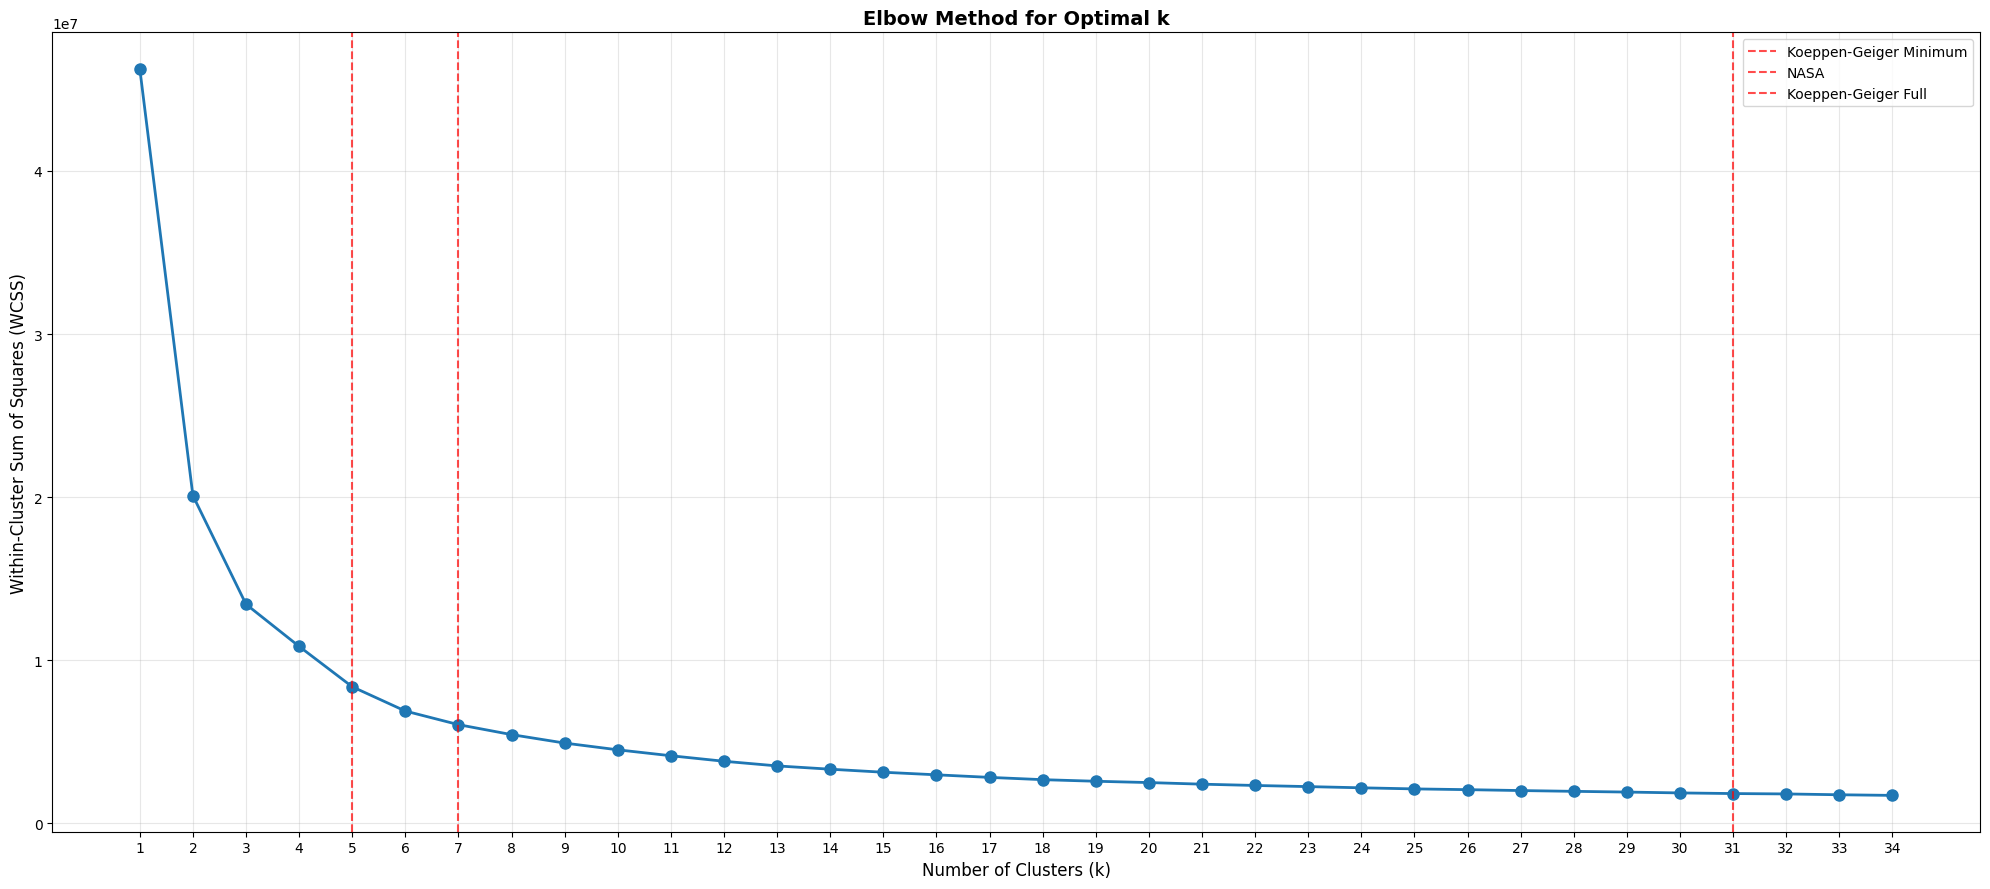

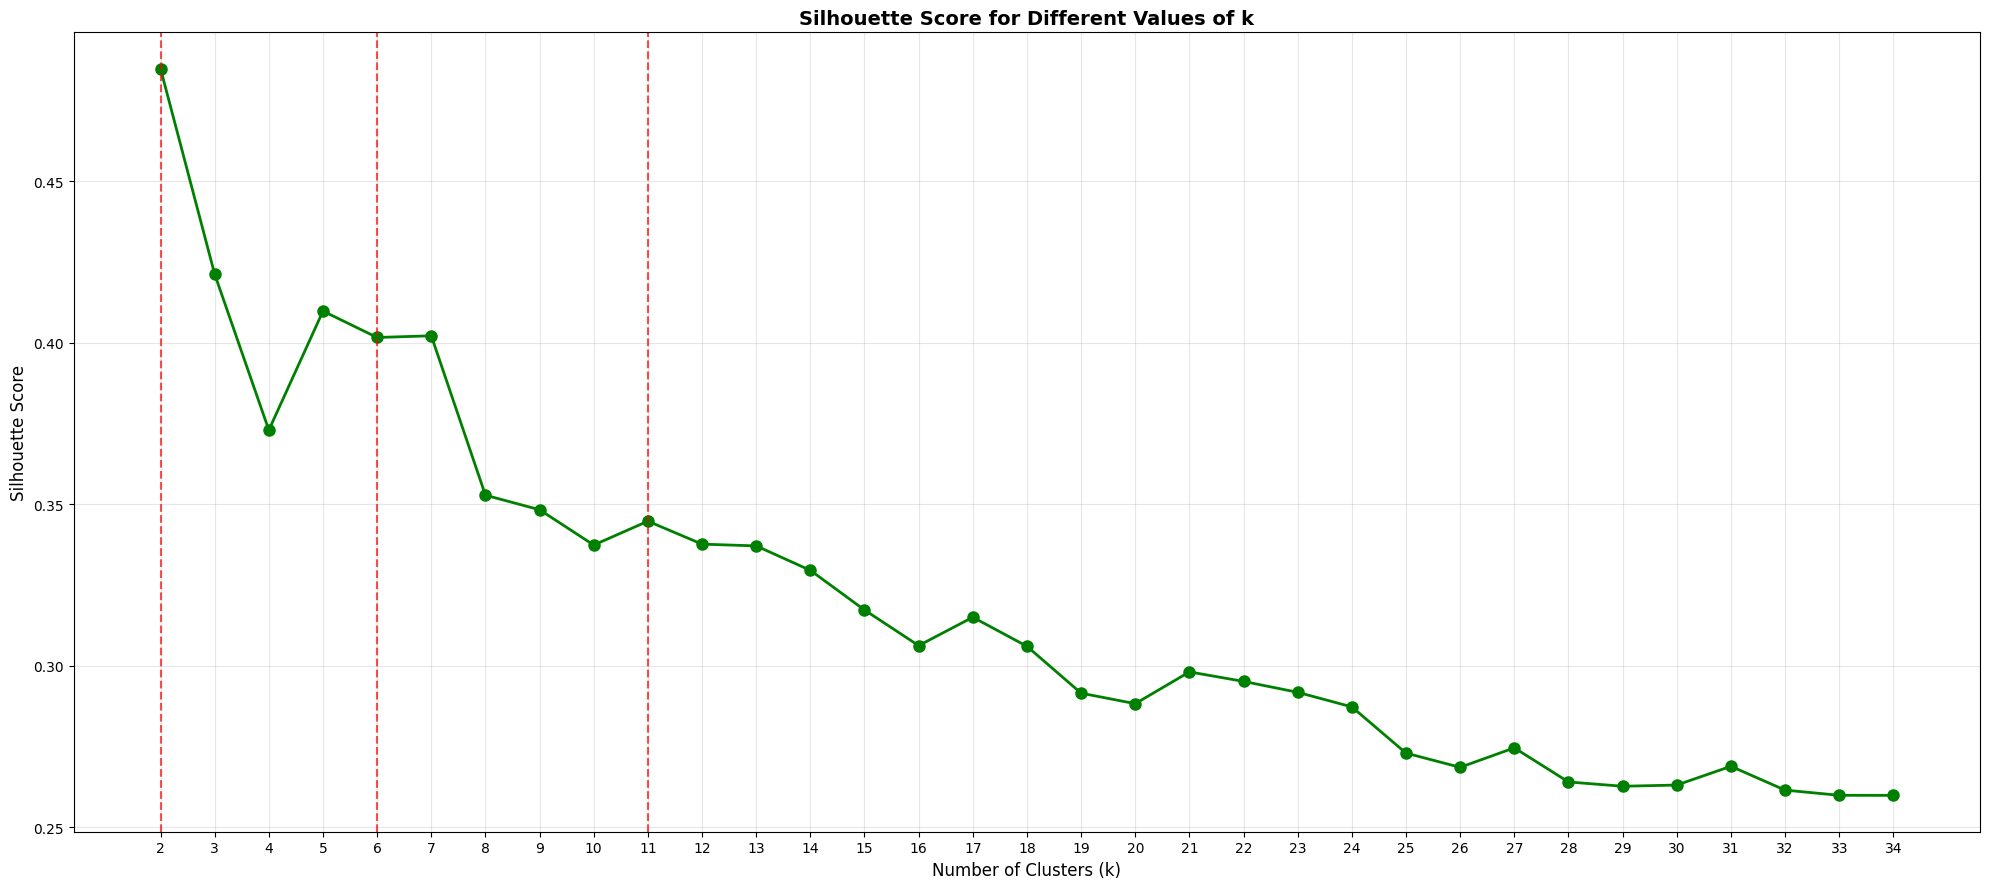

In [39]:
plt.figure(figsize=(20, 9))

plt.plot(k_range, wcss, marker='o', linewidth=2, markersize=8)

plt.xlabel('Number of Clusters (k)', fontsize=12)

plt.ylabel('Within-Cluster Sum of Squares (WCSS)', fontsize=12)

plt.title('Elbow Method for Optimal k', fontsize=14, fontweight='bold')

plt.grid(True, alpha=0.3)

plt.xticks(k_range)

plt.axvline(x=5, color='red', linestyle='--', alpha=0.7, label='Koeppen-Geiger Minimum')

plt.axvline(x=7, color='red', linestyle='--', alpha=0.7, label='NASA')

plt.axvline(x=31, color='red', linestyle='--', alpha=0.7, label='Koeppen-Geiger Full')

plt.legend()

plt.tight_layout()

plt.show()

plt.figure(figsize=(20, 9))

plt.grid(True, alpha=0.3)

plt.plot(k_range_silhouette, silhouette_scores, marker='o', linewidth=2, markersize=8, color='green')

plt.xlabel('Number of Clusters (k)', fontsize=12)

plt.ylabel('Silhouette Score', fontsize=12)

plt.title('Silhouette Score for Different Values of k', fontsize=14, fontweight='bold')

plt.grid(True, alpha=0.3)

plt.xticks(k_range_silhouette)

plt.axvline(x=2, color='red', linestyle='--', alpha=0.7)

plt.axvline(x=6, color='red', linestyle='--', alpha=0.7)

plt.axvline(x=11, color='red', linestyle='--', alpha=0.7)

plt.tight_layout()

plt.show()

The elbow method doesn't show a clear line of diminishing returns. The existing Koeppen-Geiger climate classification has 5 main classifications with several subclassifications in each. The NASA map has 7 classifications.<br>

The silhouette score gives a better set of n_clusters=k. 

(write a blurb about Koeppen-Geiger classification system.)

In [40]:
k_values = [2, 5, 11]

<img src='data/map-koeppen-geiger-globe.jpg'></img>

/var/folders/gl/919514x5085c7h3zzn_f471w0000gp/T/ipykernel_67144/1154320571.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap(cmap_name, num_categories)


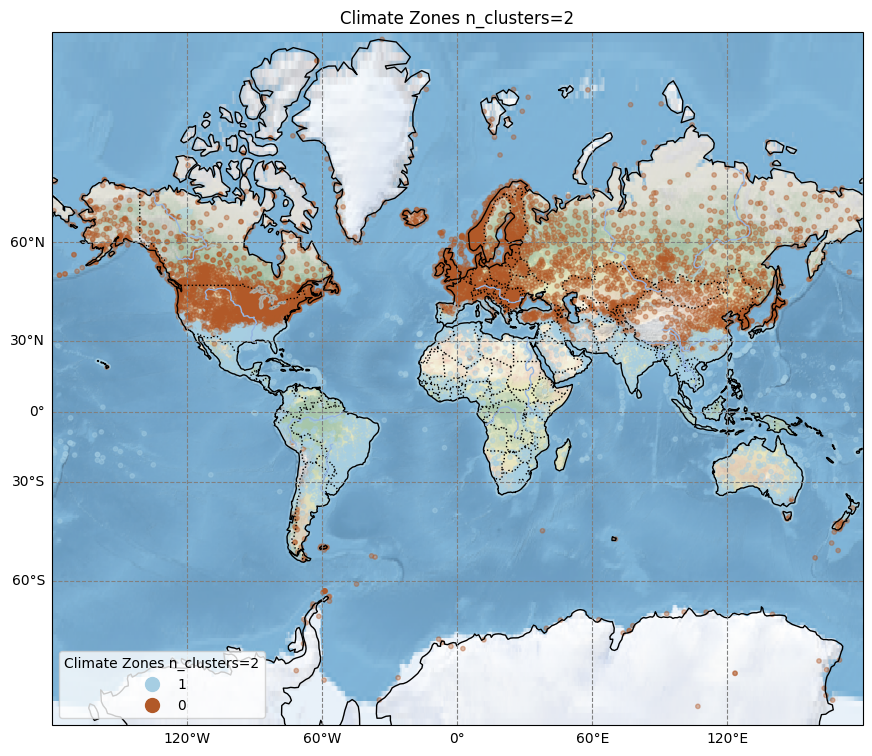

/var/folders/gl/919514x5085c7h3zzn_f471w0000gp/T/ipykernel_67144/1154320571.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap(cmap_name, num_categories)


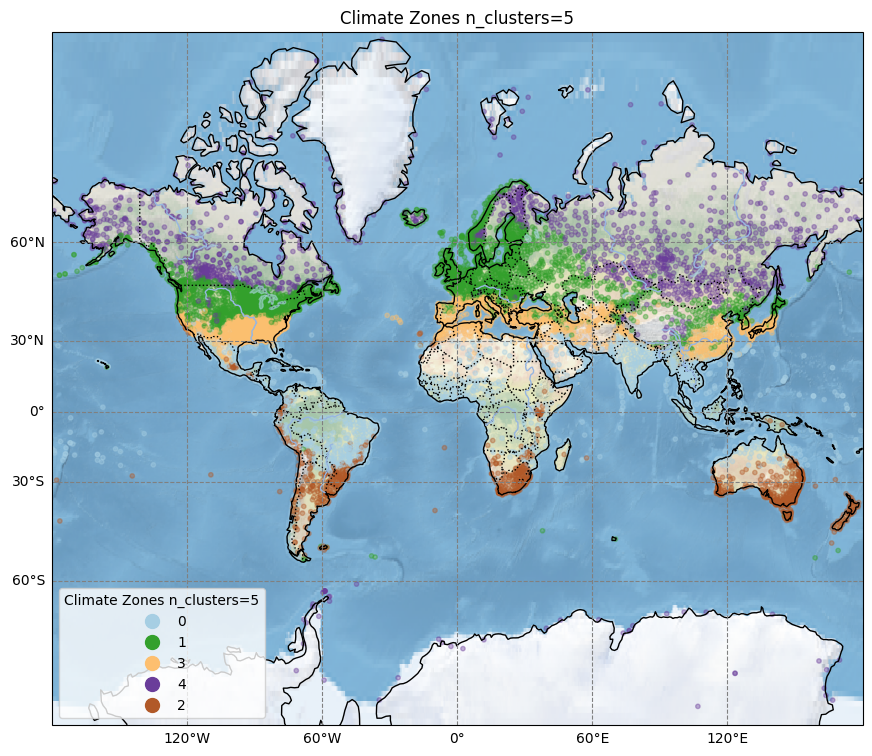

In [ ]:
X = monthly_pivot.copy()

for n_clusters in k_values: 
    kmeans_3d_pred = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)

    labels_k = kmeans_3d_pred.fit_predict(X)

    monthly_pivot[f"CLIMATE ZONE n_clusters={n_clusters}"] = labels_k
    
    monthly_pivot_w_stations = monthly_pivot.merge(ncei_stations_id[['LONGITUDE','LATITUDE','NAME']],
                                                   on='NAME',
                                                   how='left')

    monthly_pivot_w_stations = monthly_pivot_w_stations.dropna()

    levels, categories = pd.factorize(monthly_pivot_w_stations[f"CLIMATE ZONE n_clusters={n_clusters}"])

    num_categories = len(categories)

    cmap_name = 'Paired'

    cmap = plt.cm.get_cmap(cmap_name, num_categories)

    plot_map(f"Climate Zones n_clusters={n_clusters}",
             monthly_pivot_w_stations['LONGITUDE'],
             monthly_pivot_w_stations['LATITUDE'],
             c=levels,
             labels=monthly_pivot_w_stations[f"CLIMATE ZONE n_clusters={n_clusters}"],
             cmap=cmap,
             s=10,
             alpha=0.4)

<center>NASA Biomes Map</center>
<img src='data/map-nasa-biomes.png'></img>
<img src='data/labels-nasa-biome.png'></img>

In [ ]:
n_clusters = 31

kmeans_3d_pred = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)

labels_k = kmeans_3d_pred.fit_predict(monthly_pivot)

monthly_pivot[f"CLIMATE ZONE n_clusters={n_clusters}"] = labels_k

monthly_full_df = monthly_pivot.merge(ncei_atmospheric_aggregate.groupby('NAME').head(1), on='NAME', how='inner')

levels, categories = pd.factorize(monthly_full_df[f"CLIMATE ZONE n_clusters={n_clusters}"])

num_categories = len(categories)

cmap_name = 'Paired'

cmap = plt.cm.get_cmap(cmap_name, num_categories)

plot_map(f"Climate Zones k={n_clusters}",
         monthly_full_df['LONGITUDE'],
         monthly_full_df['LATITUDE'],
         c=levels,
         labels=monthly_full_df[f"CLIMATE ZONE n_clusters={n_clusters}"],
         cmap=cmap,
         s=10,
         alpha=0.4)

In [ ]:
monthly_pivot.to_csv('data/monthly_pivot.csv')

In [ ]:
#=============================================================================
# Code generated by Artificial Intelligence (Google AI)
# Date: 2025-12-08
# Prompt: "The code demonstrates how to use Matplotlib subplots 
# to create distinct seaborn heatmaps for different DataFrame columns, allowing 
# each plot to have its own color scale and color bar.
# =============================================================================
fig, _maps = plt.subplots(nrows=1, ncols=2, figsize=(15, 5), sharey=True)

cmaps = ['plasma', 'plasma']

pivot_tables = {'Temperature' : temp_pivot,
                'Precipitation' : precip_pivot}

for index, (key, value) in enumerate(pivot_tables.items()):
    sns.heatmap(data=monthly_pivot[value.columns],
                ax=_maps[index],
                cmap=cmaps[index],
                cbar=False,
                annot=False,
                fmt=".1f"
    )

    _maps[index].set_title(f'{key} Heatmap')
  
plt.tight_layout()

plt.show()

for n_clusters in k_values:
    fig, _maps = plt.subplots(nrows=1, ncols=2, figsize=(15, 5), sharey=True)

    for index, (key, value) in enumerate(pivot_tables.items()):
        sns.heatmap(data=monthly_pivot.sort_values(f"CLIMATE ZONE n_clusters={n_clusters}")[value.columns],
                    ax=_maps[index],
                    cmap=cmaps[index],
                    cbar=False,
                    annot=False,
                    fmt=".1f"
        )

        _maps[index].set_title(f'{key} Heatmap')

    plt.tight_layout()

    plt.show()



In [ ]:
for n_clusters in k_values:
    pca_full = PCA(n_components=n_clusters, random_state=42)

    X_pca_full = pca_full.fit_transform(monthly_pivot.sort_values(f"CLIMATE ZONE n_clusters={n_clusters}")[temp_pivot.columns])

    fig = plt.figure(figsize=(20, 9))

    sns.scatterplot(
        data=X_pca_full,
        alpha=0.7
    )

    plt.tight_layout()

    plt.show()

In [ ]:
for n_clusters in k_values:
    pca_full = PCA(n_components=n_clusters, random_state=42)

    sort_order = list(temp_pivot.columns) + [f"CLIMATE ZONE n_clusters={n_clusters}"]

    sorted_pivot = monthly_pivot.sort_values(by=sort_order)

    X_pca_full = pca_full.fit_transform(sorted_pivot[temp_pivot.columns])
    
    fig = plt.figure(figsize=(20, 9))

    sns.scatterplot(
        data=X_pca_full,
        alpha=0.8
    )

    plt.tight_layout()

    plt.show()

I'm actually unsure of exactly what I'm looking at with the PCA. Here's my interpretation: the y-axis represents temperature, as the largest source of variance, and the x-axis represents the individual stations. The first PCA plot gives a clue, if you look at the map of k=2, it looks like the clusters are Northern Hemisphere and Southern Hemisphere. For half of the year, either hemipshere will be opposite the other, so I'm assuming there is a time component in the x-axis. I want to use these PCA plots to describe Climate Zones, I just don't have sufficient knowledge of what the components are or how to analyze them.<br>

Looks like there are climate zones that are relatively stable across the entire year, and then climate zones that vary. How can I use these plots to describe climate zones.<br>

How would the second set of plots be arranged back into a cyclical nature?